# Identificação do Participante

In [1]:
#preencha com sua matrícula no Formato F + 7 algarismos, sem dígito verificador
#exemplo: chaveF = "F1234567"
chaveF = "F6779951"

# Conhecendo o problema de Negócios

O gestor identificou alta rotatividade de profissionais na empresa nos últimos anos. Pensando na **retenção de talentos** e na **continuidade dos negócios**, ele gostaria de prever quantos e quais funcionários estão mais propensos a deixarem a empresa. Ele acredita que, se conseguisse prever o **turnover**, poderia estruturar melhor um programa de retenção ou até mesmo novas estratégias de treinamento e preparação de pessoas para assumirem novos postos na organização.

O turnover, no contexto de gestão de pessoas, é a **taxa de rotatividade de funcionários**, que mede fluxo de entradas e saídas de pessoas em uma organização durante determinado período. As saídas podem ocorrer por vários motivos, sejam eles desligamentos, demissões ou aposentadorias.

## Definindo o público alvo do modelo

Funcionários das agências e PSOs nas seguintes situações: 

    - Estão atualmente lotados nas agências e PSOs
    
    - Estiveram lotados nas agências e PSOs nos últimos 3 anos
    
    - Se desligaram do Banco nos últimos 3 anos


# Bases de dados

|Arquivo|Nome|Descrição|Referência|Fonte|
|---|---|---|---|---|
|salarios.csv|Tabela Comissões - Remuneração|Tabela com todas as funções ativas e seus respectivos valores de referência de remuneração.|2022|SISBB ARH - 10 - 02 - 03|
|situacoes.csv|Tabela Situações de Trabalho|Tabela com todos os códigos das Situações de Trabalho dos funcionários e suas respectivas descrições.|2022|SISBB ARH 10 - 02 - 44|
|gfm.csv|Tabela GFM - Grupo de Funções para Movimentação|Tabela com os códigos do Grupo de Funções para Movimentação (GFM) correspondentes a cada função ativa.|2022|IN 369-1, item 1.1.4|
|vs_cad_basc1_6csv.gz, vs_cad_basc2_6csv.gz, vs_cad_basc3_6csv.gz, vs_cad_basc4_6csv.gz, vs_cad_basc5_6csv.gz e vs_cad_basc6_6csv.gz|Cadastro Básico Funcis|Tabela com informações do cadastro básico dos funcionários da ativa e desligados.|2023|DB2DWH|
|vs_cursos1csv.gz e vs_cursos2csv.gz|Quantidade de cursos realizados pelo Funci|Tabela com a quantidade total de cursos realizados por cada Fucionário da ativa ou desligado, desde a sua posse no Banco.|2023|DB2GTD|

Ver documentação completa no pacote de arquivos disponibilizado para o Desafio.

# Relacionamentos

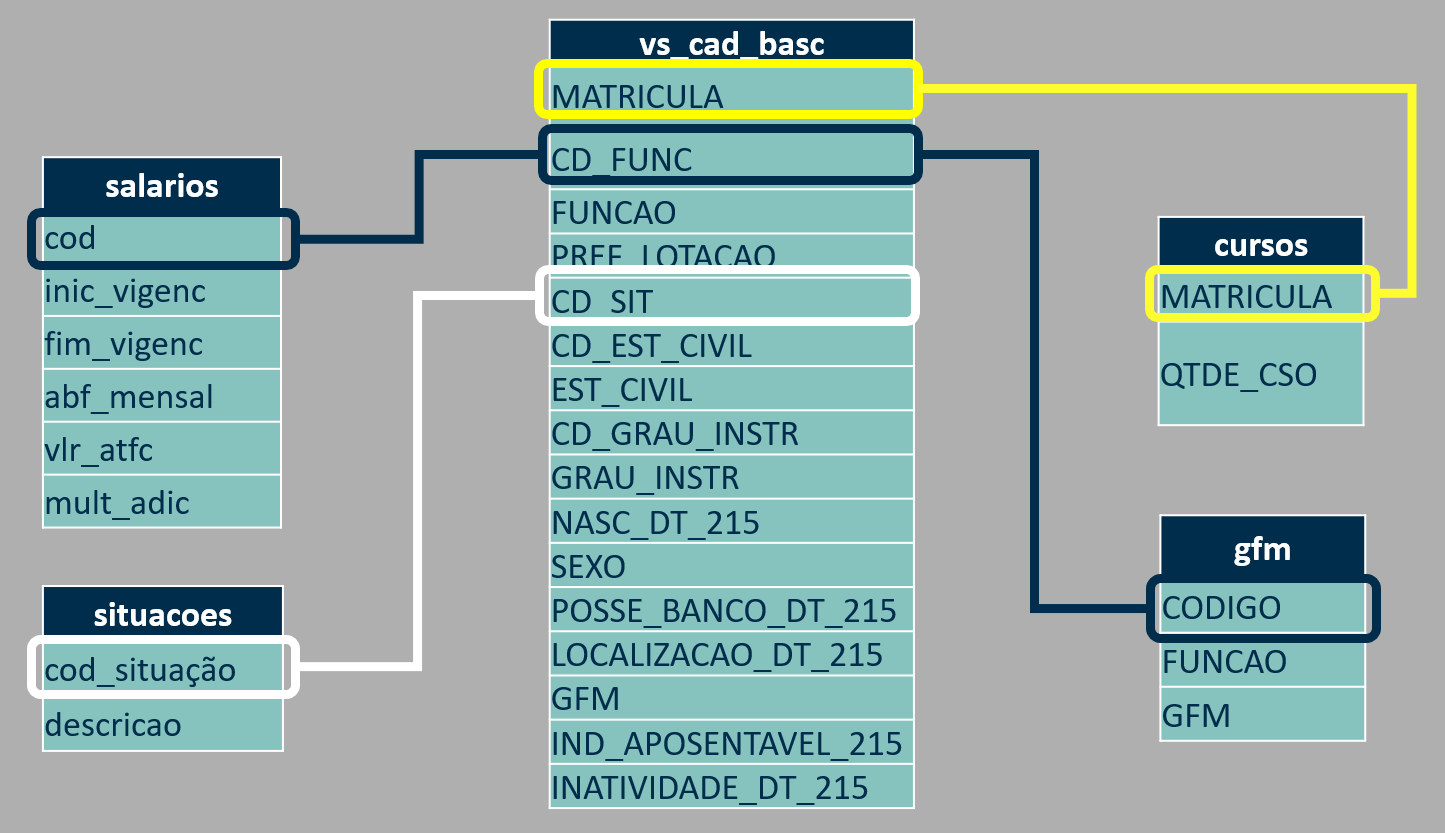

# Orientações

# Exercício 1 – Formatação da ABT (Tabela Base Analítica)

Criar um DataFrame chamado **exercicio1** com os seguintes atributos:

|Nome Lógico|Nome Físico|Formato|Descrição|Aceita Nulos|Tabela Origem|Atributo Origem|
|---|---|---|---|---|---|---|
|Código da Matrícula do Funcionário|?|OBJECT|Código da matrícula do funcionário anonimizada.|Não|VS_CAD_BASC|MATRICULA|
|Código da Função do Funcionário|?|INT|Código da função exercida pelo funcionário na data de atualização da tabela ou na data de desligamento.|Não|VS_CAD_BASC|CD_FUNC|
|Nome da Função do Funcionário|?|OBJECT|Descrição da função exercida pelo funcionário na data de atualização da tabela ou na data de desligamento.|Não|VS_CAD_BASC|FUNCAO|
|Código do Prefixo de Lotação|?|OBJECT|Prefixo da dependência de lotação do funcionário anonimizado.|Não|VS_CAD_BASC|PREF_LOTACAO|
|Código da Situação de Trabalho|?|INT|Código da situação de trabalho do funcionário na data de atualização da tabela. Exemplo: 100 - FORCA REAL DE TRABALHO, 510 - ADIDO, etc.|Não|VS_CAD_BASC|CD_SIT|
|Nome da Situação de Trabalho|?|OBJECT|Descrição da situação de trabalho do funcionário na data de atualização da tabela.|Não|situacoes|descricao|
|Código do Estado Civil|?|OBJECT|Código do estado civil do funcionário na data de atualização da tabela ou na data de desligamento. Exemplo: 2 - CASADO(A), 8 - DIVORCIADO(A), K - CASADO(A) COM DIVORC, etc.|Não|VS_CAD_BASC|CD_EST_CIVIL|
|Nome do Estado Civil|?|OBJECT|Descrição do estado civil do funcionário na data de atualização da tabela ou na data de desligamento.|Não|VS_CAD_BASC|EST_CIVIL|
|Código do Grau de Instrução|?|INT|Código do Grau de Instrução do funcionário na data de atualização da tabela ou na data de desligamento. Exemplo: 1 - ENSINO FUNCAMENTAL, 5 - SUPERIOR GRADUACAO, etc.|Não|VS_CAD_BASC|CD_GRAU_INSTR|
|Nome do Grau de Instrução|?|OBJECT|Descrição do Grau de Instrução do funcionário na data de atualização da tabela ou na data de desligamento. |Não|VS_CAD_BASC|GRAU_INSTR|
|Data de Nascimento do Funcionário|?|DATETIME|Data de nascimento do funcionário no formato AAAA-MM-DDT00:00:00.000000000.|Não|VS_CAD_BASC|NASC_DT_215|
|Código do Gênero do Funcionário|?|INT|Código do gênero do funcionário constante do documento de identidade. Valores: 2 - Feminino, 1 - Masculino.|Não|VS_CAD_BASC|SEXO|
|Data de Posse no Banco do Brasil|?|DATETIME|Data de posse do funcionário no Banco do Brasil no formato AAAA-MM-DDT00:00:00.000000000.|Não|VS_CAD_BASC|POSSE_BANCO_DT_215|
|Data de Localização na Dependência|?|DATETIME|Data de localização do funcionário na dependência ou situação atual, no formato no formato AAAA-MM-DDT00:00:00.000000000.|Não|VS_CAD_BASC|LOCALIZACAO_DT_215|
|Código do Grupo de Função para Nomeação|?|INT|Código do Grupo de Função para Nomeação - GFM, de 1 a 20, conforme IN 369. Foi assumido o valor zero (0) para as funções sem GFM (ex: escriturário, caixa executivo, etc.).|Não|VS_CAD_BASC|GFM|
|Indicador de Condição para Aposentadoria|?|BOOL|Indicador booleano (true ou false) que aponta se o funcionário cumpre as condições para aposentadoria.|Não|VS_CAD_BASC|IND_APOSENTAVEL_215|
|Data de Desligamento do Banco do Brasil|?|DATETIME|Data de desligamento do funcionário do Banco do Brasil, quando houver, no formato AAAA-MM-DDT00:00:00.000000000.|Sim|VS_CAD_BASC|INATIVIDADE_DT_215|

**Regra 1:** eventuais valores faltantes para estado civil deverão ser substituídos por 0 - DESCONHECIDO.

**Regra 2:** para conversão do Indicador de Condição de Aposentadoria, considere o valor True para 1 e False para 0.

**Dica 1:** ao final do exercício, o DataFrame exercicio1 deverá conter todos os atributos listados acima, na mesma ordem apresentada.

**Dica 2:** o nome dos atributos do seu DataFrame exercicio1 será o Nome Físico, construído a partir do Nome Lógico. A metodologia para construção do Nome Físico está descrita nas Orientações Gerais deste notebook. Consulte a nomenclatura padrão do BB no glossário disponibilizado no pacote de dados deste Desafio.

Exemplo:
    
    Nome lógico: Código da Matrícula do Funcionário
    Nome Físico: CD_MTC_FUN
    
-----
## Descomplicando

Consulte no Vocabulário de Termos Técnicos a definição de **ABT**, caso não tenha familiaridade com o conceito.

In [2]:
## importar biblioteca pandas e fazendo os testes das versões 1.5.2 ou inferior
import pandas as pd
# importar biblioteca para ignorar os avisos do Python
import warnings
warnings.filterwarnings('ignore')
print(pd. __version__)

1.5.2


In [3]:
## importar biblioteca numpy e fazendo os testes das versões 1.23.5 ou inferior
import numpy
print(numpy. __version__)

1.23.5


In [4]:
# ler o arquivo vs_cad_basc e atribuir a uma variável: pd.read_csv()
vs_cad_basc_1 = pd.read_csv('bases/vs_cad_basc1_6csv.gz', header=0, sep=';')
vs_cad_basc_2 = pd.read_csv('bases/vs_cad_basc2_6csv.gz', header=0, sep=';')
vs_cad_basc_3 = pd.read_csv('bases/vs_cad_basc3_6csv.gz', header=0, sep=';')
vs_cad_basc_4 = pd.read_csv('bases/vs_cad_basc4_6csv.gz', header=0, sep=';')
vs_cad_basc_5 = pd.read_csv('bases/vs_cad_basc5_6csv.gz', header=0, sep=';')
vs_cad_basc_6 = pd.read_csv('bases/vs_cad_basc6_6csv.gz', header=0, sep=';')

In [5]:
#Combine os 6 objetos com colunas idênticas.DataFrame
vs_cad_basc = pd.concat([vs_cad_basc_1,vs_cad_basc_2,vs_cad_basc_3,vs_cad_basc_4, vs_cad_basc_5, vs_cad_basc_6])
vs_cad_basc

,MATRICULA,CD_FUNC,FUNCAO,PREF_LOTACAO,CD_SIT,CD_EST_CIVIL,EST_CIVIL,CD_GRAU_INSTR,GRAU_INSTR,NASC_DT_215,SEXO,POSSE_BANCO_DT_215,LOCALIZACAO_DT_215,GFM,IND_APOSENTAVEL_215,INATIVIDADE_DT_215
0,1737efbd09fe2915b2225390f9a73711,288,CAIXA EXECUTIVO,acf4b89d3d503d8252c9c4ba75ddbf6d,100,2,CASADO(A),7,POS-GRADUCAO-ESPEC,1972-04-23,1,1987-09-11,2005-09-01,0,0,NaN
1,bdf1b696a29644ef82347e0bf0a4d88c,610,ESCRITURARIO,10c72a9d42dd07a028ee910f7854da5d,809,2,CASADO(A),7,POS-GRADUCAO-ESPEC,1970-08-04,1,1988-09-01,2021-02-18,0,0,2021-02-18
2,0d7f68ccb76fb613742ebc8a89dfaf8e,394,CAIXA EXECUTIVO,25daeb9b3072e9c53f66a2196a92a011,100,1,SOLTEIRO(A),3,SUPERIOR EM ANDAMENT,1976-09-22,1,2000-03-20,2017-02-08,0,0,NaN
3,c85e8160c57343cca1d6180d30553f09,394,CAIXA EXECUTIVO,10c72a9d42dd07a028ee910f7854da5d,100,1,SOLTEIRO(A),5,SUPERIOR GRADUACAO,1974-10-27,1,2005-07-18,2012-06-29,0,0,NaN
4,a30c3e4eb8880ea5c79428787041ea9c,610,ESCRITURARIO,fd4c2dc64ccb8496e6f1f94c85f30d06,100,1,SOLTEIRO(A),7,POS-GRADUCAO-ESPEC,1994-02-09,1,2015-04-06,2015-07-27,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6628,815369633b5390d2f0896dd14ca8d45d,4940,ASSIST.A UN,1ff1de774005f8da13f42943881c655f,100,5,SEPARADO(A) JUDICIAL,5,SUPERIOR GRADUACAO,1966-05-28,2,2003-06-09,2017-03-30,19,0,NaN
6629,dfbe03a26494748aa6ddcc5ce6deb5eb,288,CAIXA EXECUTIVO,b1d10e7bafa4421218a51b1e1f1b0ba2,802,2,CASADO(A),7,POS-GRADUCAO-ESPEC,1972-05-01,2,1993-07-12,2022-10-04,0,0,2022-10-04
6630,b859df5d7c5a417b54c5e27674d36c57,16290,GER MODULO UA,4990974d150d0de5e6e15a1454fe6b0f,809,8,DIVORCIADO(A),5,SUPERIOR GRADUACAO,1964-03-16,2,2009-05-25,2021-04-09,18,0,2021-04-09
6631,6ed508561c97bbbea92ee701f63c2da9,610,ESCRITURARIO,faa98789cfb692431ffb52e13497443a,100,4,VIUVO(A),5,SUPERIOR GRADUACAO,1966-10-22,2,1998-06-22,2019-10-07,0,0,NaN


In [6]:
# ler o arquivo situacoes.csv e atribuir a uma variável: pd.read_csv()
situacoes = pd.read_csv('bases/situacoes.csv', header=0, sep=';')
situacoes

,cod_situacao,descricao
0,100,FORCA DE TRABALHO REAL
1,101,FORCA TRAB. REAL - REDESENH
2,102,FORCA TRABALHO REAL-CONTR.
3,103,FORCA TRAB REAL-AMAMENTA/1H
4,104,FORCA TRAB REAL-AMAMENTA/2H
...,...,...
345,30,PROVISAO - ENCARGOS
346,50,PROVISAO - BENEFICIOS
347,1,BENEFICIOS
348,834,DESLIGAMENTO CONSENSUAL PAQ


In [7]:
#renomear a coluna para aplicar o merge
situacoes.rename(columns={'cod_situacao' : 'CD_SIT'}, inplace=True)
situacoes.head()

,CD_SIT,descricao
0,100,FORCA DE TRABALHO REAL
1,101,FORCA TRAB. REAL - REDESENH
2,102,FORCA TRABALHO REAL-CONTR.
3,103,FORCA TRAB REAL-AMAMENTA/1H
4,104,FORCA TRAB REAL-AMAMENTA/2H


In [8]:
# unir os dois dataframes 'vs_cad_basc' e 'situacoes' : .merge
exercicio1 = vs_cad_basc.merge(situacoes, how='left', on='CD_SIT')

In [9]:
#lista de colunas do data frame exercicio1
exercicio1.columns

Index(['MATRICULA', 'CD_FUNC', 'FUNCAO', 'PREF_LOTACAO', 'CD_SIT',
       'CD_EST_CIVIL', 'EST_CIVIL', 'CD_GRAU_INSTR', 'GRAU_INSTR',
       'NASC_DT_215', 'SEXO', 'POSSE_BANCO_DT_215', 'LOCALIZACAO_DT_215',
       'GFM', 'IND_APOSENTAVEL_215', 'INATIVIDADE_DT_215', 'descricao'],
      dtype='object')

In [10]:
#Dica 1: ao final do exercício, o DataFrame exercicio1 deverá conter todos os atributos listados acima, 
#na mesma ordem apresentada.
# reordenar as colunas
# ['MATRICULA', 'CD_FUNC', 'FUNCAO', 'PREF_LOTACAO', 'CD_SIT','descricao','CD_EST_CIVIL', 'EST_CIVIL', 'CD_GRAU_INSTR', 'GRAU_INSTR','NASC_DT_215', 'SEXO', 'POSSE_BANCO_DT_215', 'LOCALIZACAO_DT_215','GFM', 'IND_APOSENTAVEL_215', 'INATIVIDADE_DT_215']
exercicio1 = exercicio1[['MATRICULA', 'CD_FUNC', 'FUNCAO', 'PREF_LOTACAO', 'CD_SIT','descricao','CD_EST_CIVIL', 'EST_CIVIL', 'CD_GRAU_INSTR', 'GRAU_INSTR','NASC_DT_215', 'SEXO', 'POSSE_BANCO_DT_215', 'LOCALIZACAO_DT_215','GFM', 'IND_APOSENTAVEL_215', 'INATIVIDADE_DT_215']]
exercicio1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39961 entries, 0 to 39960
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   MATRICULA            39961 non-null  object
 1   CD_FUNC              39961 non-null  int64 
 2   FUNCAO               39961 non-null  object
 3   PREF_LOTACAO         39961 non-null  object
 4   CD_SIT               39961 non-null  int64 
 5   descricao            39961 non-null  object
 6   CD_EST_CIVIL         39960 non-null  object
 7   EST_CIVIL            39961 non-null  object
 8   CD_GRAU_INSTR        39961 non-null  int64 
 9   GRAU_INSTR           39961 non-null  object
 10  NASC_DT_215          39961 non-null  object
 11  SEXO                 39961 non-null  int64 
 12  POSSE_BANCO_DT_215   39961 non-null  object
 13  LOCALIZACAO_DT_215   39961 non-null  object
 14  GFM                  39961 non-null  int64 
 15  IND_APOSENTAVEL_215  39961 non-null  int64 
 16  INAT

In [11]:
#Dica 2: o nome dos atributos do seu DataFrame exercicio1 será o Nome Físico, construído a partir do Nome Lógico.
#A metodologia para construção do Nome Físico está descrita nas Orientações Gerais deste notebook. 
#Consulte a nomenclatura padrão do BB no glossário disponibilizado no pacote de dados deste Desafio.
#Exemplo:
#Nome lógico: Código da Matrícula do Funcionário
#Nome Físico: CD_MTC_FUN
#'MATRICULA':'CD_MTC_FUN', 'CD_FUNC':'CD_FUC_FUN', 'FUNCAO':'NM_FUC_FUN', 'PREF_LOTACAO':'CD_PRF_LOT', 'CD_SIT':'CD_EST_TRB','descricao':'NM_EST_TRB','CD_EST_CIVIL':'CD_EST_CVL', 'EST_CIVIL':'NM_EST_CVL', 'CD_GRAU_INSTR':'CD_NVL_ITC', 'GRAU_INSTR':'NM_NVL_ITC','NASC_DT_215':'DT_NSC_FUN', 'SEXO':'CD_GNR_FUN', 'POSSE_BANCO_DT_215':'DT_PSSE_BB', 'LOCALIZACAO_DT_215':'DT_LCZC_DEPE','GFM':'CD_GR_FUC_NMO', 'IND_APOSENTAVEL_215':'IN_CND_APN', 'INATIVIDADE_DT_215':'DT_DSG_BB'
exercicio1.rename(columns={'MATRICULA':'CD_MTC_FUN', 'CD_FUNC':'CD_FUC_FUN', 'FUNCAO':'NM_FUC_FUN', 'PREF_LOTACAO':'CD_PRF_LOT', 'CD_SIT':'CD_EST_TRB','descricao':'NM_EST_TRB','CD_EST_CIVIL':'CD_EST_CVL', 'EST_CIVIL':'NM_EST_CVL', 'CD_GRAU_INSTR':'CD_NVL_ITC', 'GRAU_INSTR':'NM_NVL_ITC','NASC_DT_215':'DT_NSC_FUN', 'SEXO':'CD_GNR_FUN', 'POSSE_BANCO_DT_215':'DT_PSSE_BB', 'LOCALIZACAO_DT_215':'DT_LCZC_DEPE','GFM':'CD_GR_FUC_NMO', 'IND_APOSENTAVEL_215':'IN_CND_APN', 'INATIVIDADE_DT_215':'DT_DSG_BB'}, inplace=True)
exercicio1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39961 entries, 0 to 39960
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CD_MTC_FUN     39961 non-null  object
 1   CD_FUC_FUN     39961 non-null  int64 
 2   NM_FUC_FUN     39961 non-null  object
 3   CD_PRF_LOT     39961 non-null  object
 4   CD_EST_TRB     39961 non-null  int64 
 5   NM_EST_TRB     39961 non-null  object
 6   CD_EST_CVL     39960 non-null  object
 7   NM_EST_CVL     39961 non-null  object
 8   CD_NVL_ITC     39961 non-null  int64 
 9   NM_NVL_ITC     39961 non-null  object
 10  DT_NSC_FUN     39961 non-null  object
 11  CD_GNR_FUN     39961 non-null  int64 
 12  DT_PSSE_BB     39961 non-null  object
 13  DT_LCZC_DEPE   39961 non-null  object
 14  CD_GR_FUC_NMO  39961 non-null  int64 
 15  IN_CND_APN     39961 non-null  int64 
 16  DT_DSG_BB      4539 non-null   object
dtypes: int64(6), object(11)
memory usage: 3.8+ MB


In [12]:
#Regra 1: eventuais valores faltantes para estado civil deverão ser substituídos por 0 - DESCONHECIDO.
#fillna(0)
exercicio1['CD_EST_CVL']= exercicio1.CD_EST_CVL.fillna(0)
exercicio1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39961 entries, 0 to 39960
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CD_MTC_FUN     39961 non-null  object
 1   CD_FUC_FUN     39961 non-null  int64 
 2   NM_FUC_FUN     39961 non-null  object
 3   CD_PRF_LOT     39961 non-null  object
 4   CD_EST_TRB     39961 non-null  int64 
 5   NM_EST_TRB     39961 non-null  object
 6   CD_EST_CVL     39961 non-null  object
 7   NM_EST_CVL     39961 non-null  object
 8   CD_NVL_ITC     39961 non-null  int64 
 9   NM_NVL_ITC     39961 non-null  object
 10  DT_NSC_FUN     39961 non-null  object
 11  CD_GNR_FUN     39961 non-null  int64 
 12  DT_PSSE_BB     39961 non-null  object
 13  DT_LCZC_DEPE   39961 non-null  object
 14  CD_GR_FUC_NMO  39961 non-null  int64 
 15  IN_CND_APN     39961 non-null  int64 
 16  DT_DSG_BB      4539 non-null   object
dtypes: int64(6), object(11)
memory usage: 3.8+ MB


In [13]:
#Regra 2: para conversão do Indicador de Condição de Aposentadoria, considere o valor True para 1 e False para 0.
exercicio1['IN_CND_APN'] = exercicio1['IN_CND_APN'].astype("bool")
exercicio1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39961 entries, 0 to 39960
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CD_MTC_FUN     39961 non-null  object
 1   CD_FUC_FUN     39961 non-null  int64 
 2   NM_FUC_FUN     39961 non-null  object
 3   CD_PRF_LOT     39961 non-null  object
 4   CD_EST_TRB     39961 non-null  int64 
 5   NM_EST_TRB     39961 non-null  object
 6   CD_EST_CVL     39961 non-null  object
 7   NM_EST_CVL     39961 non-null  object
 8   CD_NVL_ITC     39961 non-null  int64 
 9   NM_NVL_ITC     39961 non-null  object
 10  DT_NSC_FUN     39961 non-null  object
 11  CD_GNR_FUN     39961 non-null  int64 
 12  DT_PSSE_BB     39961 non-null  object
 13  DT_LCZC_DEPE   39961 non-null  object
 14  CD_GR_FUC_NMO  39961 non-null  int64 
 15  IN_CND_APN     39961 non-null  bool  
 16  DT_DSG_BB      4539 non-null   object
dtypes: bool(1), int64(5), object(11)
memory usage: 3.5+ MB


In [14]:
#transformando Dtype das colunas 'DT_NSC_FUN','DT_PSSE_BB','DT_LCZC_DEPE','DT_DSG_BB' para DATETIME
exercicio1.DT_NSC_FUN = pd.to_datetime(exercicio1.DT_NSC_FUN)
exercicio1.DT_PSSE_BB = pd.to_datetime(exercicio1.DT_PSSE_BB)
exercicio1.DT_LCZC_DEPE = pd.to_datetime(exercicio1.DT_LCZC_DEPE)
exercicio1.DT_DSG_BB = pd.to_datetime(exercicio1.DT_DSG_BB)
exercicio1.head()

,CD_MTC_FUN,CD_FUC_FUN,NM_FUC_FUN,CD_PRF_LOT,CD_EST_TRB,NM_EST_TRB,CD_EST_CVL,NM_EST_CVL,CD_NVL_ITC,NM_NVL_ITC,DT_NSC_FUN,CD_GNR_FUN,DT_PSSE_BB,DT_LCZC_DEPE,CD_GR_FUC_NMO,IN_CND_APN,DT_DSG_BB
0,1737efbd09fe2915b2225390f9a73711,288,CAIXA EXECUTIVO,acf4b89d3d503d8252c9c4ba75ddbf6d,100,FORCA DE TRABALHO REAL,2,CASADO(A),7,POS-GRADUCAO-ESPEC,1972-04-23,1,1987-09-11,2005-09-01,0,False,NaT
1,bdf1b696a29644ef82347e0bf0a4d88c,610,ESCRITURARIO,10c72a9d42dd07a028ee910f7854da5d,809,DEMISSAO PEDIDO-APOSEN.INSS,2,CASADO(A),7,POS-GRADUCAO-ESPEC,1970-08-04,1,1988-09-01,2021-02-18,0,False,2021-02-18
2,0d7f68ccb76fb613742ebc8a89dfaf8e,394,CAIXA EXECUTIVO,25daeb9b3072e9c53f66a2196a92a011,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),3,SUPERIOR EM ANDAMENT,1976-09-22,1,2000-03-20,2017-02-08,0,False,NaT
3,c85e8160c57343cca1d6180d30553f09,394,CAIXA EXECUTIVO,10c72a9d42dd07a028ee910f7854da5d,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),5,SUPERIOR GRADUACAO,1974-10-27,1,2005-07-18,2012-06-29,0,False,NaT
4,a30c3e4eb8880ea5c79428787041ea9c,610,ESCRITURARIO,fd4c2dc64ccb8496e6f1f94c85f30d06,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),7,POS-GRADUCAO-ESPEC,1994-02-09,1,2015-04-06,2015-07-27,0,False,NaT


In [15]:
# converter as datas para o formato AAAA-MM-DDT00:00:00.000000000..strftime() 
exercicio1['DT_NSC_FUN'] = exercicio1['DT_NSC_FUN'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')
exercicio1['DT_PSSE_BB'] = exercicio1['DT_PSSE_BB'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')
exercicio1['DT_LCZC_DEPE'] = exercicio1['DT_LCZC_DEPE'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')
exercicio1['DT_DSG_BB'] = exercicio1['DT_DSG_BB'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')
exercicio1.head()

,CD_MTC_FUN,CD_FUC_FUN,NM_FUC_FUN,CD_PRF_LOT,CD_EST_TRB,NM_EST_TRB,CD_EST_CVL,NM_EST_CVL,CD_NVL_ITC,NM_NVL_ITC,DT_NSC_FUN,CD_GNR_FUN,DT_PSSE_BB,DT_LCZC_DEPE,CD_GR_FUC_NMO,IN_CND_APN,DT_DSG_BB
0,1737efbd09fe2915b2225390f9a73711,288,CAIXA EXECUTIVO,acf4b89d3d503d8252c9c4ba75ddbf6d,100,FORCA DE TRABALHO REAL,2,CASADO(A),7,POS-GRADUCAO-ESPEC,1972-04-23 00:00:00.000000,1,1987-09-11 00:00:00.000000,2005-09-01 00:00:00.000000,0,False,NaN
1,bdf1b696a29644ef82347e0bf0a4d88c,610,ESCRITURARIO,10c72a9d42dd07a028ee910f7854da5d,809,DEMISSAO PEDIDO-APOSEN.INSS,2,CASADO(A),7,POS-GRADUCAO-ESPEC,1970-08-04 00:00:00.000000,1,1988-09-01 00:00:00.000000,2021-02-18 00:00:00.000000,0,False,2021-02-18 00:00:00.000000
2,0d7f68ccb76fb613742ebc8a89dfaf8e,394,CAIXA EXECUTIVO,25daeb9b3072e9c53f66a2196a92a011,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),3,SUPERIOR EM ANDAMENT,1976-09-22 00:00:00.000000,1,2000-03-20 00:00:00.000000,2017-02-08 00:00:00.000000,0,False,NaN
3,c85e8160c57343cca1d6180d30553f09,394,CAIXA EXECUTIVO,10c72a9d42dd07a028ee910f7854da5d,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),5,SUPERIOR GRADUACAO,1974-10-27 00:00:00.000000,1,2005-07-18 00:00:00.000000,2012-06-29 00:00:00.000000,0,False,NaN
4,a30c3e4eb8880ea5c79428787041ea9c,610,ESCRITURARIO,fd4c2dc64ccb8496e6f1f94c85f30d06,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),7,POS-GRADUCAO-ESPEC,1994-02-09 00:00:00.000000,1,2015-04-06 00:00:00.000000,2015-07-27 00:00:00.000000,0,False,NaN


In [16]:
#transformando Dtype das colunas 'DT_NSC_FUN','DT_PSSE_BB','DT_LCZC_DEPE','DT_DSG_BB' para DATETIME
exercicio1.DT_NSC_FUN = pd.to_datetime(exercicio1.DT_NSC_FUN)
exercicio1.DT_PSSE_BB = pd.to_datetime(exercicio1.DT_PSSE_BB)
exercicio1.DT_LCZC_DEPE = pd.to_datetime(exercicio1.DT_LCZC_DEPE)
exercicio1.DT_DSG_BB = pd.to_datetime(exercicio1.DT_DSG_BB)
exercicio1.head()

,CD_MTC_FUN,CD_FUC_FUN,NM_FUC_FUN,CD_PRF_LOT,CD_EST_TRB,NM_EST_TRB,CD_EST_CVL,NM_EST_CVL,CD_NVL_ITC,NM_NVL_ITC,DT_NSC_FUN,CD_GNR_FUN,DT_PSSE_BB,DT_LCZC_DEPE,CD_GR_FUC_NMO,IN_CND_APN,DT_DSG_BB
0,1737efbd09fe2915b2225390f9a73711,288,CAIXA EXECUTIVO,acf4b89d3d503d8252c9c4ba75ddbf6d,100,FORCA DE TRABALHO REAL,2,CASADO(A),7,POS-GRADUCAO-ESPEC,1972-04-23,1,1987-09-11,2005-09-01,0,False,NaT
1,bdf1b696a29644ef82347e0bf0a4d88c,610,ESCRITURARIO,10c72a9d42dd07a028ee910f7854da5d,809,DEMISSAO PEDIDO-APOSEN.INSS,2,CASADO(A),7,POS-GRADUCAO-ESPEC,1970-08-04,1,1988-09-01,2021-02-18,0,False,2021-02-18
2,0d7f68ccb76fb613742ebc8a89dfaf8e,394,CAIXA EXECUTIVO,25daeb9b3072e9c53f66a2196a92a011,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),3,SUPERIOR EM ANDAMENT,1976-09-22,1,2000-03-20,2017-02-08,0,False,NaT
3,c85e8160c57343cca1d6180d30553f09,394,CAIXA EXECUTIVO,10c72a9d42dd07a028ee910f7854da5d,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),5,SUPERIOR GRADUACAO,1974-10-27,1,2005-07-18,2012-06-29,0,False,NaT
4,a30c3e4eb8880ea5c79428787041ea9c,610,ESCRITURARIO,fd4c2dc64ccb8496e6f1f94c85f30d06,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),7,POS-GRADUCAO-ESPEC,1994-02-09,1,2015-04-06,2015-07-27,0,False,NaT


In [17]:
#Criar um DataFrame chamado exercicio1 com os atributos solicitados
exercicio1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39961 entries, 0 to 39960
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CD_MTC_FUN     39961 non-null  object        
 1   CD_FUC_FUN     39961 non-null  int64         
 2   NM_FUC_FUN     39961 non-null  object        
 3   CD_PRF_LOT     39961 non-null  object        
 4   CD_EST_TRB     39961 non-null  int64         
 5   NM_EST_TRB     39961 non-null  object        
 6   CD_EST_CVL     39961 non-null  object        
 7   NM_EST_CVL     39961 non-null  object        
 8   CD_NVL_ITC     39961 non-null  int64         
 9   NM_NVL_ITC     39961 non-null  object        
 10  DT_NSC_FUN     39961 non-null  datetime64[ns]
 11  CD_GNR_FUN     39961 non-null  int64         
 12  DT_PSSE_BB     39961 non-null  datetime64[ns]
 13  DT_LCZC_DEPE   39961 non-null  datetime64[ns]
 14  CD_GR_FUC_NMO  39961 non-null  int64         
 15  IN_CND_APN     3996

# Exercício 2 – Identificação das pessoas que deixaram a empresa

## Parte 1 - Situação de desligamento

Criar um DataFrame chamado **exercicio2** contendo todos os atributos do Exercício 1 mais o atributo descrito abaixo:

|Nome Lógico|Nome Físico|Formato|Descrição|Aceita Nulos|Tabela Origem|Atributo Origem|
|---|---|---|---|---|---|---|
|Indicador da Situação de Desligamento|?|BOOL|Indicador booleano (true ou false) que aponta se o funcionário se desligou do Banco ou não.|Não|-|-|

**Dica 1:** a ausência de dados em Data de Desligamento do BB indica que o funcionário ainda está ativo.

## Parte 2 - Filtragem dos dados

Com base nas informações de Situações de Trabalho, desprezar todos os registros de funcionários desligados por iniciativa do Banco ou por motivos adversos à vontade do próprio funcionário em se desligar.

**Desprezar:** situações de desligamento por iniciativa do Banco ou motivos adversos

**Exemplos:**

    • demissão com ou sem justa-causa, 
        
    • extinção do contrato de experiência, 
        
    • falecimento, 
        
    • etc. 

**Manter:** situações de desligamento por iniciativa do próprio funcionário

**Exemplos:**

    • aposentadoria,
        
    • demissão a pedido,

    • adesão ao PAQ,
        
    • recusa em assinar o contrato de experiência,
        
    • etc. 

**Dica 2:** as situações de trabalho abaixo não caracterizam desligamento do banco:

    • Adição
    
    • Colaboração
    
    • Disponibilidade para órgãos externos ou empresas coligadas (DISP)
    
    • Licença Saúde (LS)
    
    • Licença Interesse (LIC. INTERES.)

**Dica 3:** a aposentadoria pelo INSS por si só não caracteriza desligamento do Banco.

-----
## Descomplicando

O conceito de **"desprezar registros"**, no contexto da nossa ABT, significa desconsiderar, ou seja, deixar de fora esses registros, pois eles não apenas não são o foco da nossa análise como podem distorcer nosso modelo.

Dessa forma, devemos **manter** apenas aqueles registros que são úteis para a nossa análise.

Veja no Vocabulário de Termos Técnicos a importância de **Filtrar registros** antes de partir para a aplicação do modelo.

In [18]:
#Criar um DataFrame chamado exercicio2 contendo todos os atributos do Exercício 1 mais o atributo solcitado
exercicio2 = exercicio1.copy()

In [19]:
#Criar um DataFrame chamado exercicio2 contendo todos os atributos do Exercício 1 mais o atributo solcitado
exercicio2['IN_EST_DSG'] = exercicio2['DT_DSG_BB'].dt.year > 0
exercicio2

,CD_MTC_FUN,CD_FUC_FUN,NM_FUC_FUN,CD_PRF_LOT,CD_EST_TRB,NM_EST_TRB,CD_EST_CVL,NM_EST_CVL,CD_NVL_ITC,NM_NVL_ITC,DT_NSC_FUN,CD_GNR_FUN,DT_PSSE_BB,DT_LCZC_DEPE,CD_GR_FUC_NMO,IN_CND_APN,DT_DSG_BB,IN_EST_DSG
0,1737efbd09fe2915b2225390f9a73711,288,CAIXA EXECUTIVO,acf4b89d3d503d8252c9c4ba75ddbf6d,100,FORCA DE TRABALHO REAL,2,CASADO(A),7,POS-GRADUCAO-ESPEC,1972-04-23,1,1987-09-11,2005-09-01,0,False,NaT,False
1,bdf1b696a29644ef82347e0bf0a4d88c,610,ESCRITURARIO,10c72a9d42dd07a028ee910f7854da5d,809,DEMISSAO PEDIDO-APOSEN.INSS,2,CASADO(A),7,POS-GRADUCAO-ESPEC,1970-08-04,1,1988-09-01,2021-02-18,0,False,2021-02-18,True
2,0d7f68ccb76fb613742ebc8a89dfaf8e,394,CAIXA EXECUTIVO,25daeb9b3072e9c53f66a2196a92a011,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),3,SUPERIOR EM ANDAMENT,1976-09-22,1,2000-03-20,2017-02-08,0,False,NaT,False
3,c85e8160c57343cca1d6180d30553f09,394,CAIXA EXECUTIVO,10c72a9d42dd07a028ee910f7854da5d,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),5,SUPERIOR GRADUACAO,1974-10-27,1,2005-07-18,2012-06-29,0,False,NaT,False
4,a30c3e4eb8880ea5c79428787041ea9c,610,ESCRITURARIO,fd4c2dc64ccb8496e6f1f94c85f30d06,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),7,POS-GRADUCAO-ESPEC,1994-02-09,1,2015-04-06,2015-07-27,0,False,NaT,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39956,815369633b5390d2f0896dd14ca8d45d,4940,ASSIST.A UN,1ff1de774005f8da13f42943881c655f,100,FORCA DE TRABALHO REAL,5,SEPARADO(A) JUDICIAL,5,SUPERIOR GRADUACAO,1966-05-28,2,2003-06-09,2017-03-30,19,False,NaT,False
39957,dfbe03a26494748aa6ddcc5ce6deb5eb,288,CAIXA EXECUTIVO,b1d10e7bafa4421218a51b1e1f1b0ba2,802,DEMISSAO PEDIDO-APOS.ANTEC.,2,CASADO(A),7,POS-GRADUCAO-ESPEC,1972-05-01,2,1993-07-12,2022-10-04,0,False,2022-10-04,True
39958,b859df5d7c5a417b54c5e27674d36c57,16290,GER MODULO UA,4990974d150d0de5e6e15a1454fe6b0f,809,DEMISSAO PEDIDO-APOSEN.INSS,8,DIVORCIADO(A),5,SUPERIOR GRADUACAO,1964-03-16,2,2009-05-25,2021-04-09,18,False,2021-04-09,True
39959,6ed508561c97bbbea92ee701f63c2da9,610,ESCRITURARIO,faa98789cfb692431ffb52e13497443a,100,FORCA DE TRABALHO REAL,4,VIUVO(A),5,SUPERIOR GRADUACAO,1966-10-22,2,1998-06-22,2019-10-07,0,False,NaT,False


In [20]:
#contagem de valores False and True para identificação
exercicio2.value_counts('IN_EST_DSG')

IN_EST_DSG
False    35422
True      4539
dtype: int64

In [21]:
#Contagem de registros por nome da situação de trabalho
exercicio2.value_counts('NM_EST_TRB')

NM_EST_TRB
FORCA DE TRABALHO REAL         34732
DEMISSAO PEDIDO-APOSEN.INSS     1915
DEMISSAO A PEDIDO                936
DEMISSAO PEDIDO-APOS.ANTEC.      825
DESLIGAMENTO CONSENSUAL PAQ      488
LS COMUM/PELO INSS               414
FALECIDOS                        192
EXTINCAO CONTRATO EXPERIENC       75
LS ACID.TRABALHO-DOENCA/INS       74
COLABORADOR                       56
DEMISSAO INTER. SERV.-PAQ         53
DESLIGAMENTO PARA APOSENTAD       43
EXCLUSAO TEMPORARIA INTEGRA       40
LIC.INTERES. SUP 90 DIAS-CT       32
ADIDOS                            24
DISP.S/ONUS/PG.DEB-C/CONT.T       21
LS APOSENTADO INSS-APOS 15        18
APOSENTADOS ISENTO DE IR          12
DISP.C/ONUS C/CONTAGEM TEMP       11
dtype: int64

In [22]:
#Parte2-Filtragem dos dados 'consultar' Com base nas informações de Situações de Trabalho, desprezar todos os registros de funcionários 
#desligados por iniciativa do Banco OU por motivos adversos à vontade do próprio funcionário em se desligar.
exercicio2 = exercicio2.loc[(exercicio2['NM_EST_TRB']!='FALECIDOS') & (exercicio2['NM_EST_TRB']!='EXTINCAO CONTRATO EXPERIENC')]
exercicio2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39694 entries, 0 to 39960
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CD_MTC_FUN     39694 non-null  object        
 1   CD_FUC_FUN     39694 non-null  int64         
 2   NM_FUC_FUN     39694 non-null  object        
 3   CD_PRF_LOT     39694 non-null  object        
 4   CD_EST_TRB     39694 non-null  int64         
 5   NM_EST_TRB     39694 non-null  object        
 6   CD_EST_CVL     39694 non-null  object        
 7   NM_EST_CVL     39694 non-null  object        
 8   CD_NVL_ITC     39694 non-null  int64         
 9   NM_NVL_ITC     39694 non-null  object        
 10  DT_NSC_FUN     39694 non-null  datetime64[ns]
 11  CD_GNR_FUN     39694 non-null  int64         
 12  DT_PSSE_BB     39694 non-null  datetime64[ns]
 13  DT_LCZC_DEPE   39694 non-null  datetime64[ns]
 14  CD_GR_FUC_NMO  39694 non-null  int64         
 15  IN_CND_APN     3969

# Exercício 3: Calcular novos atributos

Criar um DataFrame **exercicio3** a partir do DataFrame exercício2, acrescentando os atributos conforme detalhado abaixo:

|Nome Lógico|Nome Físico|Formato|Descrição|Aceita Nulos|Tabela Origem|Atributo Origem|
|---|---|---|---|---|---|---|
|Ano de Nascimento do Funcionário|?|INT|Ano de Nascimento do funcionário.|Não|-|-|
|Quantidade de Idade do Funcionário|?|INT|Idade do funcionário em anos, calculada desde a data de nascimento até 31/12/2022, no caso dos funcionários ativos, ou até a data de desligamento do Banco, para os funcionários desligados.|Não|-|-|
|Quantidade de Tempo de Banco|?|INT|Tempo de Banco em anos, calculado desde a posse do funcionário até 31/12/2022, no caso dos funcionários ativos, ou até a data de desligamento do Banco, para os funcionários desligados.|Não|-|-|
|Quantidade de Cursos Realizados|?|INT|Quantidade total de cursos realizados pelo funcionário desde sua posse no Banco.|Não|vs_cursos|QTDE_CSO|
|Valor de Referência do Salário|?|FLOAT|Valor de Referência em reais (R$) da função exercida pelo funcionário.|Não|salarios|vr|

**Regra 1:** para as funções abaixo relacionadas, considere os seguintes valores:

- Funções 610, 649 e 999: incluir valor de referência de agente comercial: R$ 3.622,23
    
- Funções 288 e 394: salário escriturário + abf_mensal das funções, conforme consta na tabela salarios

**Regra 2:** desprezar os registros de funcionários em outras funções onde não for possível identificar o salário (valor nulo ou zerado).


In [23]:
#copiar.dataframe.exercicio2 para evitar a alteração do DataFrame original
exercicio3_1=exercicio2.copy()

In [24]:
#Ano de Nascimento do funcionário com 4 dígitos
exercicio3_1['AA_NSC_FUN'] = exercicio3_1['DT_NSC_FUN'].dt.year

In [25]:
#Criar a coluna de data_limite para realizar os cálculos
exercicio3_1['data_limite'] = pd.to_datetime('2022-12-31', unit='ns')

In [26]:
#Idade do funcionário em anos, calculada desde a data de nascimento até 31/12/2022,
#no caso dos funcionários ativos, ou até a data de desligamento do Banco, para os funcionários desligados.
exercicio3_1['QT_IDD_FUN'] = numpy.where ((exercicio3_1['DT_DSG_BB'].dt.year) > 0, (exercicio3_1['DT_DSG_BB'] - exercicio3_1['DT_NSC_FUN'])//numpy.timedelta64(1, 'Y'),(exercicio3_1['data_limite'] - exercicio3_1['DT_NSC_FUN']) // numpy.timedelta64(1, 'Y')) 
exercicio3_1

,CD_MTC_FUN,CD_FUC_FUN,NM_FUC_FUN,CD_PRF_LOT,CD_EST_TRB,NM_EST_TRB,CD_EST_CVL,NM_EST_CVL,CD_NVL_ITC,NM_NVL_ITC,...,CD_GNR_FUN,DT_PSSE_BB,DT_LCZC_DEPE,CD_GR_FUC_NMO,IN_CND_APN,DT_DSG_BB,IN_EST_DSG,AA_NSC_FUN,data_limite,QT_IDD_FUN
0,1737efbd09fe2915b2225390f9a73711,288,CAIXA EXECUTIVO,acf4b89d3d503d8252c9c4ba75ddbf6d,100,FORCA DE TRABALHO REAL,2,CASADO(A),7,POS-GRADUCAO-ESPEC,...,1,1987-09-11,2005-09-01,0,False,NaT,False,1972,2022-12-31,50.0
1,bdf1b696a29644ef82347e0bf0a4d88c,610,ESCRITURARIO,10c72a9d42dd07a028ee910f7854da5d,809,DEMISSAO PEDIDO-APOSEN.INSS,2,CASADO(A),7,POS-GRADUCAO-ESPEC,...,1,1988-09-01,2021-02-18,0,False,2021-02-18,True,1970,2022-12-31,50.0
2,0d7f68ccb76fb613742ebc8a89dfaf8e,394,CAIXA EXECUTIVO,25daeb9b3072e9c53f66a2196a92a011,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),3,SUPERIOR EM ANDAMENT,...,1,2000-03-20,2017-02-08,0,False,NaT,False,1976,2022-12-31,46.0
3,c85e8160c57343cca1d6180d30553f09,394,CAIXA EXECUTIVO,10c72a9d42dd07a028ee910f7854da5d,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),5,SUPERIOR GRADUACAO,...,1,2005-07-18,2012-06-29,0,False,NaT,False,1974,2022-12-31,48.0
4,a30c3e4eb8880ea5c79428787041ea9c,610,ESCRITURARIO,fd4c2dc64ccb8496e6f1f94c85f30d06,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),7,POS-GRADUCAO-ESPEC,...,1,2015-04-06,2015-07-27,0,False,NaT,False,1994,2022-12-31,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39956,815369633b5390d2f0896dd14ca8d45d,4940,ASSIST.A UN,1ff1de774005f8da13f42943881c655f,100,FORCA DE TRABALHO REAL,5,SEPARADO(A) JUDICIAL,5,SUPERIOR GRADUACAO,...,2,2003-06-09,2017-03-30,19,False,NaT,False,1966,2022-12-31,56.0
39957,dfbe03a26494748aa6ddcc5ce6deb5eb,288,CAIXA EXECUTIVO,b1d10e7bafa4421218a51b1e1f1b0ba2,802,DEMISSAO PEDIDO-APOS.ANTEC.,2,CASADO(A),7,POS-GRADUCAO-ESPEC,...,2,1993-07-12,2022-10-04,0,False,2022-10-04,True,1972,2022-12-31,50.0
39958,b859df5d7c5a417b54c5e27674d36c57,16290,GER MODULO UA,4990974d150d0de5e6e15a1454fe6b0f,809,DEMISSAO PEDIDO-APOSEN.INSS,8,DIVORCIADO(A),5,SUPERIOR GRADUACAO,...,2,2009-05-25,2021-04-09,18,False,2021-04-09,True,1964,2022-12-31,57.0
39959,6ed508561c97bbbea92ee701f63c2da9,610,ESCRITURARIO,faa98789cfb692431ffb52e13497443a,100,FORCA DE TRABALHO REAL,4,VIUVO(A),5,SUPERIOR GRADUACAO,...,2,1998-06-22,2019-10-07,0,False,NaT,False,1966,2022-12-31,56.0


In [27]:
#Tempo de Banco em anos, calculado desde a posse do funcionário até 31/12/2022, no caso dos funcionários ativos,
#ou até a data de desligamento do Banco, para os funcionários desligados.
exercicio3_1['QT_TMP_BCO'] = numpy.where ((exercicio3_1['DT_DSG_BB'].dt.year) > 0, (exercicio3_1['DT_DSG_BB'] - exercicio3_1['DT_PSSE_BB'])//numpy.timedelta64(1, 'Y'), (exercicio3_1['data_limite'] - exercicio3_1['DT_PSSE_BB'])// numpy.timedelta64(1, 'Y'))


In [28]:
#Tempo de Banco em anos, calculado desde a posse do funcionário até 31/12/2022, no caso dos funcionários ativos,
#ou até a data de desligamento do Banco, para os funcionários desligados.
exercicio3_1['QT_TMP_BCO'] = numpy.where (exercicio3_1['QT_TMP_BCO']<0, 0, exercicio3_1['QT_TMP_BCO'])
exercicio3_1

,CD_MTC_FUN,CD_FUC_FUN,NM_FUC_FUN,CD_PRF_LOT,CD_EST_TRB,NM_EST_TRB,CD_EST_CVL,NM_EST_CVL,CD_NVL_ITC,NM_NVL_ITC,...,DT_PSSE_BB,DT_LCZC_DEPE,CD_GR_FUC_NMO,IN_CND_APN,DT_DSG_BB,IN_EST_DSG,AA_NSC_FUN,data_limite,QT_IDD_FUN,QT_TMP_BCO
0,1737efbd09fe2915b2225390f9a73711,288,CAIXA EXECUTIVO,acf4b89d3d503d8252c9c4ba75ddbf6d,100,FORCA DE TRABALHO REAL,2,CASADO(A),7,POS-GRADUCAO-ESPEC,...,1987-09-11,2005-09-01,0,False,NaT,False,1972,2022-12-31,50.0,35.0
1,bdf1b696a29644ef82347e0bf0a4d88c,610,ESCRITURARIO,10c72a9d42dd07a028ee910f7854da5d,809,DEMISSAO PEDIDO-APOSEN.INSS,2,CASADO(A),7,POS-GRADUCAO-ESPEC,...,1988-09-01,2021-02-18,0,False,2021-02-18,True,1970,2022-12-31,50.0,32.0
2,0d7f68ccb76fb613742ebc8a89dfaf8e,394,CAIXA EXECUTIVO,25daeb9b3072e9c53f66a2196a92a011,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),3,SUPERIOR EM ANDAMENT,...,2000-03-20,2017-02-08,0,False,NaT,False,1976,2022-12-31,46.0,22.0
3,c85e8160c57343cca1d6180d30553f09,394,CAIXA EXECUTIVO,10c72a9d42dd07a028ee910f7854da5d,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),5,SUPERIOR GRADUACAO,...,2005-07-18,2012-06-29,0,False,NaT,False,1974,2022-12-31,48.0,17.0
4,a30c3e4eb8880ea5c79428787041ea9c,610,ESCRITURARIO,fd4c2dc64ccb8496e6f1f94c85f30d06,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),7,POS-GRADUCAO-ESPEC,...,2015-04-06,2015-07-27,0,False,NaT,False,1994,2022-12-31,28.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39956,815369633b5390d2f0896dd14ca8d45d,4940,ASSIST.A UN,1ff1de774005f8da13f42943881c655f,100,FORCA DE TRABALHO REAL,5,SEPARADO(A) JUDICIAL,5,SUPERIOR GRADUACAO,...,2003-06-09,2017-03-30,19,False,NaT,False,1966,2022-12-31,56.0,19.0
39957,dfbe03a26494748aa6ddcc5ce6deb5eb,288,CAIXA EXECUTIVO,b1d10e7bafa4421218a51b1e1f1b0ba2,802,DEMISSAO PEDIDO-APOS.ANTEC.,2,CASADO(A),7,POS-GRADUCAO-ESPEC,...,1993-07-12,2022-10-04,0,False,2022-10-04,True,1972,2022-12-31,50.0,29.0
39958,b859df5d7c5a417b54c5e27674d36c57,16290,GER MODULO UA,4990974d150d0de5e6e15a1454fe6b0f,809,DEMISSAO PEDIDO-APOSEN.INSS,8,DIVORCIADO(A),5,SUPERIOR GRADUACAO,...,2009-05-25,2021-04-09,18,False,2021-04-09,True,1964,2022-12-31,57.0,11.0
39959,6ed508561c97bbbea92ee701f63c2da9,610,ESCRITURARIO,faa98789cfb692431ffb52e13497443a,100,FORCA DE TRABALHO REAL,4,VIUVO(A),5,SUPERIOR GRADUACAO,...,1998-06-22,2019-10-07,0,False,NaT,False,1966,2022-12-31,56.0,24.0


In [29]:
# ler o arquivo vs_cursoscsv.gz e atribuir a uma variável: pd.read_csv()
vs_cursos1csv = pd.read_csv('bases/vs_cursos1csv.gz', header=0, sep=';')

In [30]:
# ler o arquivo vs_cursoscsv.gz e atribuir a uma variável: pd.read_csv()
vs_cursos2csv = pd.read_csv('bases/vs_cursos2csv.gz', header=0, sep=';')

In [31]:
#Combine os 2 objetos com colunas idênticas.DataFrame
vs_cursos = pd.concat([vs_cursos1csv,vs_cursos2csv])
vs_cursos

,MATRICULA,QTDE_CSO
0,1737efbd09fe2915b2225390f9a73711,321
1,bdf1b696a29644ef82347e0bf0a4d88c,221
2,19baf4f704bcde641604e7ff99cf377e,349
3,6949455a69c7a6aa61ff159823736449,352
4,0d7f68ccb76fb613742ebc8a89dfaf8e,191
...,...,...
27284,dfbe03a26494748aa6ddcc5ce6deb5eb,276
27285,b859df5d7c5a417b54c5e27674d36c57,166
27286,6ed508561c97bbbea92ee701f63c2da9,262
27287,da1f7e89376d82cf0a5c861c5910852f,287


In [32]:
#Renomear as colunas para realizar o "merge" das dataframes
vs_cursos.rename(columns={'MATRICULA':'CD_MTC_FUN', 'QTDE_CSO':'QT_CSO_RLZD'}, inplace=True)
vs_cursos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57053 entries, 0 to 27288
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CD_MTC_FUN   57053 non-null  object
 1   QT_CSO_RLZD  57053 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [33]:
#Unir as dataframes exercicio3 e vs_curso:
exercicio3_2 = exercicio3_1.merge(vs_cursos, how='left', on='CD_MTC_FUN')
exercicio3_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39694 entries, 0 to 39693
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CD_MTC_FUN     39694 non-null  object        
 1   CD_FUC_FUN     39694 non-null  int64         
 2   NM_FUC_FUN     39694 non-null  object        
 3   CD_PRF_LOT     39694 non-null  object        
 4   CD_EST_TRB     39694 non-null  int64         
 5   NM_EST_TRB     39694 non-null  object        
 6   CD_EST_CVL     39694 non-null  object        
 7   NM_EST_CVL     39694 non-null  object        
 8   CD_NVL_ITC     39694 non-null  int64         
 9   NM_NVL_ITC     39694 non-null  object        
 10  DT_NSC_FUN     39694 non-null  datetime64[ns]
 11  CD_GNR_FUN     39694 non-null  int64         
 12  DT_PSSE_BB     39694 non-null  datetime64[ns]
 13  DT_LCZC_DEPE   39694 non-null  datetime64[ns]
 14  CD_GR_FUC_NMO  39694 non-null  int64         
 15  IN_CND_APN     3969

In [34]:
# ler o arquivo salarios e atribuir a uma variável: pd.read_csv()
salarios = pd.read_csv('bases/salarios.csv', header=0, sep=';')
salarios

,cod,inic_vigenc,fim_vigenc,abf_mensal,vlr_atfc,vlr_dm,mult_adic,vr
0,1,09/2022,99/9999,10392.76,6452.01,0,0.00934,78982.05
1,2,09/2022,99/9999,10392.78,6452.01,0,0.00934,71164.17
2,3,09/2022,99/9999,10392.78,6452.01,0,0.00934,60606.35
3,4,09/2022,99/9999,10392.78,6452.01,0,0.00934,60606.35
4,5,09/2022,99/9999,10392.78,6452.01,0,0.00934,31280.21
...,...,...,...,...,...,...,...,...
3541,31925,09/2022,99/9999,9444.87,0.00,0,0.00602,21583.34
3542,31930,09/2022,99/9999,9680.99,0.00,0,0.00602,22122.90
3543,31935,09/2022,99/9999,9923.01,0.00,0,0.00602,22675.99
3544,31940,09/2022,99/9999,10171.08,0.00,0,0.00602,23242.87


In [35]:
#Renomear as colunas para realizar o "merge" das dataframes
salarios.rename(columns={'cod':'CD_FUC_FUN', 'vr':'VL_REF_SLR'}, inplace=True)
salarios.drop(columns=['inic_vigenc', 'fim_vigenc','vlr_atfc','vlr_dm','mult_adic'], inplace=True)
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546 entries, 0 to 3545
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CD_FUC_FUN  3546 non-null   int64  
 1   abf_mensal  3546 non-null   float64
 2   VL_REF_SLR  3546 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 83.2 KB


In [36]:
#Unir as dataframes exercicio3 e vs_curso:
#Valor de Referência em reais (R$) da função exercida pelo funcionário.
exercicio3_3 = exercicio3_2.merge(salarios, how='left', on='CD_FUC_FUN')
exercicio3_3

,CD_MTC_FUN,CD_FUC_FUN,NM_FUC_FUN,CD_PRF_LOT,CD_EST_TRB,NM_EST_TRB,CD_EST_CVL,NM_EST_CVL,CD_NVL_ITC,NM_NVL_ITC,...,IN_CND_APN,DT_DSG_BB,IN_EST_DSG,AA_NSC_FUN,data_limite,QT_IDD_FUN,QT_TMP_BCO,QT_CSO_RLZD,abf_mensal,VL_REF_SLR
0,1737efbd09fe2915b2225390f9a73711,288,CAIXA EXECUTIVO,acf4b89d3d503d8252c9c4ba75ddbf6d,100,FORCA DE TRABALHO REAL,2,CASADO(A),7,POS-GRADUCAO-ESPEC,...,False,NaT,False,1972,2022-12-31,50.0,35.0,321.0,1690.66,0.00
1,bdf1b696a29644ef82347e0bf0a4d88c,610,ESCRITURARIO,10c72a9d42dd07a028ee910f7854da5d,809,DEMISSAO PEDIDO-APOSEN.INSS,2,CASADO(A),7,POS-GRADUCAO-ESPEC,...,False,2021-02-18,True,1970,2022-12-31,50.0,32.0,221.0,NaN,NaN
2,0d7f68ccb76fb613742ebc8a89dfaf8e,394,CAIXA EXECUTIVO,25daeb9b3072e9c53f66a2196a92a011,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),3,SUPERIOR EM ANDAMENT,...,False,NaT,False,1976,2022-12-31,46.0,22.0,191.0,1690.66,0.00
3,c85e8160c57343cca1d6180d30553f09,394,CAIXA EXECUTIVO,10c72a9d42dd07a028ee910f7854da5d,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),5,SUPERIOR GRADUACAO,...,False,NaT,False,1974,2022-12-31,48.0,17.0,227.0,1690.66,0.00
4,a30c3e4eb8880ea5c79428787041ea9c,610,ESCRITURARIO,fd4c2dc64ccb8496e6f1f94c85f30d06,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),7,POS-GRADUCAO-ESPEC,...,False,NaT,False,1994,2022-12-31,28.0,7.0,351.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39689,815369633b5390d2f0896dd14ca8d45d,4940,ASSIST.A UN,1ff1de774005f8da13f42943881c655f,100,FORCA DE TRABALHO REAL,5,SEPARADO(A) JUDICIAL,5,SUPERIOR GRADUACAO,...,False,NaT,False,1966,2022-12-31,56.0,19.0,382.0,2526.33,6684.34
39690,dfbe03a26494748aa6ddcc5ce6deb5eb,288,CAIXA EXECUTIVO,b1d10e7bafa4421218a51b1e1f1b0ba2,802,DEMISSAO PEDIDO-APOS.ANTEC.,2,CASADO(A),7,POS-GRADUCAO-ESPEC,...,False,2022-10-04,True,1972,2022-12-31,50.0,29.0,276.0,1690.66,0.00
39691,b859df5d7c5a417b54c5e27674d36c57,16290,GER MODULO UA,4990974d150d0de5e6e15a1454fe6b0f,809,DEMISSAO PEDIDO-APOSEN.INSS,8,DIVORCIADO(A),5,SUPERIOR GRADUACAO,...,False,2021-04-09,True,1964,2022-12-31,57.0,11.0,166.0,3481.36,7957.39
39692,6ed508561c97bbbea92ee701f63c2da9,610,ESCRITURARIO,faa98789cfb692431ffb52e13497443a,100,FORCA DE TRABALHO REAL,4,VIUVO(A),5,SUPERIOR GRADUACAO,...,False,NaT,False,1966,2022-12-31,56.0,24.0,262.0,NaN,NaN


In [37]:
#Regra 1: para as funções abaixo relacionadas, considere os seguintes valores:
#Funções 610, 649 e 999: incluir valor de referência de agente comercial: R$ 3.622,23
exercicio3_3['VL_REF_SLR'] = numpy.where (exercicio3_3['CD_FUC_FUN'] == 610, 3622.23, exercicio3_3['VL_REF_SLR'])
exercicio3_3['VL_REF_SLR'] = numpy.where (exercicio3_3['CD_FUC_FUN'] == 649, 3622.23, exercicio3_3['VL_REF_SLR'])
exercicio3_3['VL_REF_SLR'] = numpy.where (exercicio3_3['CD_FUC_FUN'] == 999, 3622.23, exercicio3_3['VL_REF_SLR'])
exercicio3_3

,CD_MTC_FUN,CD_FUC_FUN,NM_FUC_FUN,CD_PRF_LOT,CD_EST_TRB,NM_EST_TRB,CD_EST_CVL,NM_EST_CVL,CD_NVL_ITC,NM_NVL_ITC,...,IN_CND_APN,DT_DSG_BB,IN_EST_DSG,AA_NSC_FUN,data_limite,QT_IDD_FUN,QT_TMP_BCO,QT_CSO_RLZD,abf_mensal,VL_REF_SLR
0,1737efbd09fe2915b2225390f9a73711,288,CAIXA EXECUTIVO,acf4b89d3d503d8252c9c4ba75ddbf6d,100,FORCA DE TRABALHO REAL,2,CASADO(A),7,POS-GRADUCAO-ESPEC,...,False,NaT,False,1972,2022-12-31,50.0,35.0,321.0,1690.66,0.00
1,bdf1b696a29644ef82347e0bf0a4d88c,610,ESCRITURARIO,10c72a9d42dd07a028ee910f7854da5d,809,DEMISSAO PEDIDO-APOSEN.INSS,2,CASADO(A),7,POS-GRADUCAO-ESPEC,...,False,2021-02-18,True,1970,2022-12-31,50.0,32.0,221.0,NaN,3622.23
2,0d7f68ccb76fb613742ebc8a89dfaf8e,394,CAIXA EXECUTIVO,25daeb9b3072e9c53f66a2196a92a011,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),3,SUPERIOR EM ANDAMENT,...,False,NaT,False,1976,2022-12-31,46.0,22.0,191.0,1690.66,0.00
3,c85e8160c57343cca1d6180d30553f09,394,CAIXA EXECUTIVO,10c72a9d42dd07a028ee910f7854da5d,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),5,SUPERIOR GRADUACAO,...,False,NaT,False,1974,2022-12-31,48.0,17.0,227.0,1690.66,0.00
4,a30c3e4eb8880ea5c79428787041ea9c,610,ESCRITURARIO,fd4c2dc64ccb8496e6f1f94c85f30d06,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),7,POS-GRADUCAO-ESPEC,...,False,NaT,False,1994,2022-12-31,28.0,7.0,351.0,NaN,3622.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39689,815369633b5390d2f0896dd14ca8d45d,4940,ASSIST.A UN,1ff1de774005f8da13f42943881c655f,100,FORCA DE TRABALHO REAL,5,SEPARADO(A) JUDICIAL,5,SUPERIOR GRADUACAO,...,False,NaT,False,1966,2022-12-31,56.0,19.0,382.0,2526.33,6684.34
39690,dfbe03a26494748aa6ddcc5ce6deb5eb,288,CAIXA EXECUTIVO,b1d10e7bafa4421218a51b1e1f1b0ba2,802,DEMISSAO PEDIDO-APOS.ANTEC.,2,CASADO(A),7,POS-GRADUCAO-ESPEC,...,False,2022-10-04,True,1972,2022-12-31,50.0,29.0,276.0,1690.66,0.00
39691,b859df5d7c5a417b54c5e27674d36c57,16290,GER MODULO UA,4990974d150d0de5e6e15a1454fe6b0f,809,DEMISSAO PEDIDO-APOSEN.INSS,8,DIVORCIADO(A),5,SUPERIOR GRADUACAO,...,False,2021-04-09,True,1964,2022-12-31,57.0,11.0,166.0,3481.36,7957.39
39692,6ed508561c97bbbea92ee701f63c2da9,610,ESCRITURARIO,faa98789cfb692431ffb52e13497443a,100,FORCA DE TRABALHO REAL,4,VIUVO(A),5,SUPERIOR GRADUACAO,...,False,NaT,False,1966,2022-12-31,56.0,24.0,262.0,NaN,3622.23


In [38]:
#Regra 1: para as funções abaixo relacionadas, considere os seguintes valores:
#Funções 288 e 394: salário escriturário + abf_mensal das funções, conforme consta na tabela salarios
exercicio3_3['VL_REF_SLR'] = numpy.where (exercicio3_3['CD_FUC_FUN'] == 288, 3622.23 + exercicio3_3['abf_mensal'] , exercicio3_3['VL_REF_SLR'])
exercicio3_3['VL_REF_SLR'] = numpy.where (exercicio3_3['CD_FUC_FUN'] == 394, 3622.23 + exercicio3_3['abf_mensal'] , exercicio3_3['VL_REF_SLR'])
exercicio3_3

,CD_MTC_FUN,CD_FUC_FUN,NM_FUC_FUN,CD_PRF_LOT,CD_EST_TRB,NM_EST_TRB,CD_EST_CVL,NM_EST_CVL,CD_NVL_ITC,NM_NVL_ITC,...,IN_CND_APN,DT_DSG_BB,IN_EST_DSG,AA_NSC_FUN,data_limite,QT_IDD_FUN,QT_TMP_BCO,QT_CSO_RLZD,abf_mensal,VL_REF_SLR
0,1737efbd09fe2915b2225390f9a73711,288,CAIXA EXECUTIVO,acf4b89d3d503d8252c9c4ba75ddbf6d,100,FORCA DE TRABALHO REAL,2,CASADO(A),7,POS-GRADUCAO-ESPEC,...,False,NaT,False,1972,2022-12-31,50.0,35.0,321.0,1690.66,5312.89
1,bdf1b696a29644ef82347e0bf0a4d88c,610,ESCRITURARIO,10c72a9d42dd07a028ee910f7854da5d,809,DEMISSAO PEDIDO-APOSEN.INSS,2,CASADO(A),7,POS-GRADUCAO-ESPEC,...,False,2021-02-18,True,1970,2022-12-31,50.0,32.0,221.0,NaN,3622.23
2,0d7f68ccb76fb613742ebc8a89dfaf8e,394,CAIXA EXECUTIVO,25daeb9b3072e9c53f66a2196a92a011,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),3,SUPERIOR EM ANDAMENT,...,False,NaT,False,1976,2022-12-31,46.0,22.0,191.0,1690.66,5312.89
3,c85e8160c57343cca1d6180d30553f09,394,CAIXA EXECUTIVO,10c72a9d42dd07a028ee910f7854da5d,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),5,SUPERIOR GRADUACAO,...,False,NaT,False,1974,2022-12-31,48.0,17.0,227.0,1690.66,5312.89
4,a30c3e4eb8880ea5c79428787041ea9c,610,ESCRITURARIO,fd4c2dc64ccb8496e6f1f94c85f30d06,100,FORCA DE TRABALHO REAL,1,SOLTEIRO(A),7,POS-GRADUCAO-ESPEC,...,False,NaT,False,1994,2022-12-31,28.0,7.0,351.0,NaN,3622.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39689,815369633b5390d2f0896dd14ca8d45d,4940,ASSIST.A UN,1ff1de774005f8da13f42943881c655f,100,FORCA DE TRABALHO REAL,5,SEPARADO(A) JUDICIAL,5,SUPERIOR GRADUACAO,...,False,NaT,False,1966,2022-12-31,56.0,19.0,382.0,2526.33,6684.34
39690,dfbe03a26494748aa6ddcc5ce6deb5eb,288,CAIXA EXECUTIVO,b1d10e7bafa4421218a51b1e1f1b0ba2,802,DEMISSAO PEDIDO-APOS.ANTEC.,2,CASADO(A),7,POS-GRADUCAO-ESPEC,...,False,2022-10-04,True,1972,2022-12-31,50.0,29.0,276.0,1690.66,5312.89
39691,b859df5d7c5a417b54c5e27674d36c57,16290,GER MODULO UA,4990974d150d0de5e6e15a1454fe6b0f,809,DEMISSAO PEDIDO-APOSEN.INSS,8,DIVORCIADO(A),5,SUPERIOR GRADUACAO,...,False,2021-04-09,True,1964,2022-12-31,57.0,11.0,166.0,3481.36,7957.39
39692,6ed508561c97bbbea92ee701f63c2da9,610,ESCRITURARIO,faa98789cfb692431ffb52e13497443a,100,FORCA DE TRABALHO REAL,4,VIUVO(A),5,SUPERIOR GRADUACAO,...,False,NaT,False,1966,2022-12-31,56.0,24.0,262.0,NaN,3622.23


In [39]:
#excluir a coluna 'abf_mensal' do dataframe
exercicio3_3.drop(columns=['abf_mensal','data_limite'], inplace=True)

In [40]:
#informações da dataframe para acompanhamento
exercicio3_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39694 entries, 0 to 39693
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CD_MTC_FUN     39694 non-null  object        
 1   CD_FUC_FUN     39694 non-null  int64         
 2   NM_FUC_FUN     39694 non-null  object        
 3   CD_PRF_LOT     39694 non-null  object        
 4   CD_EST_TRB     39694 non-null  int64         
 5   NM_EST_TRB     39694 non-null  object        
 6   CD_EST_CVL     39694 non-null  object        
 7   NM_EST_CVL     39694 non-null  object        
 8   CD_NVL_ITC     39694 non-null  int64         
 9   NM_NVL_ITC     39694 non-null  object        
 10  DT_NSC_FUN     39694 non-null  datetime64[ns]
 11  CD_GNR_FUN     39694 non-null  int64         
 12  DT_PSSE_BB     39694 non-null  datetime64[ns]
 13  DT_LCZC_DEPE   39694 non-null  datetime64[ns]
 14  CD_GR_FUC_NMO  39694 non-null  int64         
 15  IN_CND_APN     3969

In [41]:
#Regra 2: desprezar os registros de funcionários em outras funções onde não for possível identificar o salário
#(valor nulo ou zerado).
exercicio3_3['QT_CSO_RLZD']= exercicio3_3.QT_CSO_RLZD.fillna(0)
exercicio3_3['VL_REF_SLR']= exercicio3_3.VL_REF_SLR.fillna(0)
exercicio3 = exercicio3_3.loc[exercicio3_3['VL_REF_SLR']!=0]
exercicio3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39077 entries, 0 to 39693
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CD_MTC_FUN     39077 non-null  object        
 1   CD_FUC_FUN     39077 non-null  int64         
 2   NM_FUC_FUN     39077 non-null  object        
 3   CD_PRF_LOT     39077 non-null  object        
 4   CD_EST_TRB     39077 non-null  int64         
 5   NM_EST_TRB     39077 non-null  object        
 6   CD_EST_CVL     39077 non-null  object        
 7   NM_EST_CVL     39077 non-null  object        
 8   CD_NVL_ITC     39077 non-null  int64         
 9   NM_NVL_ITC     39077 non-null  object        
 10  DT_NSC_FUN     39077 non-null  datetime64[ns]
 11  CD_GNR_FUN     39077 non-null  int64         
 12  DT_PSSE_BB     39077 non-null  datetime64[ns]
 13  DT_LCZC_DEPE   39077 non-null  datetime64[ns]
 14  CD_GR_FUC_NMO  39077 non-null  int64         
 15  IN_CND_APN     3907

In [42]:
#converter as colunas abaixo para "int64"
exercicio3['QT_IDD_FUN'] = exercicio3['QT_IDD_FUN'].astype("int64")
exercicio3['QT_TMP_BCO'] = exercicio3['QT_TMP_BCO'].astype("int64")
exercicio3['QT_CSO_RLZD'] = exercicio3['QT_CSO_RLZD'].astype("int64")
exercicio3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39077 entries, 0 to 39693
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CD_MTC_FUN     39077 non-null  object        
 1   CD_FUC_FUN     39077 non-null  int64         
 2   NM_FUC_FUN     39077 non-null  object        
 3   CD_PRF_LOT     39077 non-null  object        
 4   CD_EST_TRB     39077 non-null  int64         
 5   NM_EST_TRB     39077 non-null  object        
 6   CD_EST_CVL     39077 non-null  object        
 7   NM_EST_CVL     39077 non-null  object        
 8   CD_NVL_ITC     39077 non-null  int64         
 9   NM_NVL_ITC     39077 non-null  object        
 10  DT_NSC_FUN     39077 non-null  datetime64[ns]
 11  CD_GNR_FUN     39077 non-null  int64         
 12  DT_PSSE_BB     39077 non-null  datetime64[ns]
 13  DT_LCZC_DEPE   39077 non-null  datetime64[ns]
 14  CD_GR_FUC_NMO  39077 non-null  int64         
 15  IN_CND_APN     3907

In [43]:
#gabarito para validar dados ao final do exercicio
print ('idade', 'tempo', 'curso', 'salario')
exercicio3.QT_IDD_FUN.sum(), exercicio3.QT_TMP_BCO.sum(), exercicio3.QT_CSO_RLZD.sum(), exercicio3.VL_REF_SLR.sum()

idade tempo curso salario


(1733667, 566535, 12459523, 270090590.09)

# Exercício 4 - Variáveis categóricas

Criar um DataFrame chamado **exercicio4** a partir do DataFrame **exercicio3**, porém contendo apenas as variáveis mais interessantes para o modelo.

A escolha das variáveis fica a critério do participante, com exceção dos atributos abaixo relacionados, que devem obrigatóriamente ser contemplados, conforme especificações abaixo:

|Nome Lógico|Nome Físico|Formato|Descrição|Aceita Nulos|
|---|---|---|---|---|
|Código do Grupo de Função para Nomeação|?|INT|Código do Grupo de Função para Nomeação - GFM, conforme IN 369, porém com uma categoria extra, de número 21, representando os escriturários, caixas, etc.|Não|
|Indicador da Situação de Desligamento|?|BOOL|Indicador booleano (true ou false) que aponta se o funcionário se desligou do Banco ou não.|Não|
|Ano de Nascimento do Funcionário|?|CATEGORY|Ano de Nascimento do funcionário dividido em categorias, conforme as gerações: Grande Geração (1901 a 1925), Geração Silenciosa (1926 a 1944), Baby Boomers (1945 a 1964), Geração X (1965 a 1979), Millennials (1980 a 1996), Geração Z (1997 a 2009) e Geração Alpha (2010 a 2020)|Não|
|Quantidade de Idade do Funcionário|?|CATEGORY|Idade do funcionário em anos, dividida em categorias: até 30, 31 a 40, 41 a 50, 51 a 60, 61 a 70 e 71 ou mais.|Não|
|Quantidade de Tempo de Banco|?|CATEGORY|Tempo de Banco em anos, dividido em categorias: até 4, 5 a 9, 10 a 19, 20 a 29, 30 a 39, 40 ou mais.|Não|
|Quantidade de Cursos Realizados|?|CATEGORY|Quantidade total de cursos realizados pelo funcionário desde sua posse no Banco dividida em categorias: até 99, 100 a 299, 300 a 499, 500 a 699, 700 ou mais.|Não|
|Valor de Referência do Salário|?|CATEGORY|Valor de Referência em reais (R$) da função exercida pelo funcionário, dividida em hierarquias: até 5 mil, 5 a 10 mil, 10 a 20 mil, 20 a 30 mil, 30 a 40 mil.|Não|

**Dica:** note que algumas variáveis numéricas foram transformadas em categóricas, por isso os tipos de dados também sofreram alterações.

**Regra 1:** o nome físico dos campos transformados não deve sofrer alterações.

**Regra 2:** o valor zero (0) no Código do Grupo de Função para Nomeação deverá ser substituído por 21 para evitar distorções na hierarquia dos dados. Deste modo, quanto maior o valor do GFM, menor a posição na hierarquia do Banco.

**Regra 3:** na descrição do atributo Valor de Referência do Salário, onde lê-se "ate 5 mil", leia-se "até 4.999,99" e assim por diante.

**Regra 4:** deverão ser criadas todas as categorias mencionadas na descrição dos atributos, independente de haver registros para elas ou não.

**Regra 5:** o nome das categorias não precisa seguir exatamente a grafia proposta no exercício, porém os valores dos intervalos devem ser respeitados.

**Dica 1:** o método .cut() do pandas é uma forma de garantir a criação de todas as categorias, conforme a regra 4, e tem a vantagem de transformar o tipo de dados em categorico automaticamente.

----
## Descomplicando

Consulte o Glossário de Termos Técnicos para saber mais sobre o conceito de **variáveis categóricas** e sua relevância para aplicação de modelos preditivos.

Veja também sobre a importância de considerarmos a **hierarquia dos dados** ao trabalharmos com códigos numéricos.

In [44]:
#copiar dataframe exercicio3 para evitar alteraçaõ do DataFrame original
exercicio4=exercicio3.copy()
exercicio4['CD_GR_FUC_NMO'].describe()

count    39077.000000
mean         8.321007
std          8.616233
min          0.000000
25%          0.000000
50%          6.000000
75%         18.000000
max         20.000000
Name: CD_GR_FUC_NMO, dtype: float64

In [45]:
#Regra 2: o valor zero (0) no Código do Grupo de Função para Nomeação deverá ser substituído por 21 para evitar distorções na hierarquia dos dados.
#Deste modo, quanto maior o valor do GFM, menor a posição na hierarquia do Banco.
exercicio4['CD_GR_FUC_NMO'] = numpy.where (exercicio4['CD_GR_FUC_NMO'] == 0, 21, exercicio4['CD_GR_FUC_NMO'])
exercicio4['CD_GR_FUC_NMO'].describe()

count    39077.000000
mean        18.780971
std          3.226664
min          2.000000
25%         18.000000
50%         20.000000
75%         21.000000
max         21.000000
Name: CD_GR_FUC_NMO, dtype: float64

In [46]:
#describe() para analisar incialmente a descrição de cursos
exercicio4['AA_NSC_FUN'].describe()

count    39077.000000
mean      1977.431891
std          9.334104
min       1941.000000
25%       1971.000000
50%       1979.000000
75%       1984.000000
max       2004.000000
Name: AA_NSC_FUN, dtype: float64

In [47]:
#Ano de Nascimento do funcionário dividido em categorias, conforme as gerações: 
#Grande Geração (1901 a 1925), Geração Silenciosa (1926 a 1944), Baby Boomers (1945 a 1964), 
#Geração X (1965 a 1979), Millennials (1980 a 1996), Geração Z (1997 a 2009) e Geração Alpha (2010 a 2020)
classes_nascimento = [1900, 1925, 1944, 1964, 1979, 1996, 2009, 2020] #criação das classes
labels_nascimento = ['Grande Geração', 'Geração Silenciosa', 'Baby Boomers', 'Geração X', 'Millennials', 'Geração Z', 'Geração Alpha'] #criando os labels

In [48]:
#aplicando o cut após estabelecer as categorias:
exercicio4['AA_NSC_FUN'] = pd.cut(exercicio4['AA_NSC_FUN'], classes_nascimento, labels = labels_nascimento)
exercicio4['AA_NSC_FUN']

0           Geração X
1           Geração X
2           Geração X
3           Geração X
4         Millennials
             ...     
39689       Geração X
39690       Geração X
39691    Baby Boomers
39692       Geração X
39693     Millennials
Name: AA_NSC_FUN, Length: 39077, dtype: category
Categories (7, object): ['Grande Geração' < 'Geração Silenciosa' < 'Baby Boomers' < 'Geração X' <
                         'Millennials' < 'Geração Z' < 'Geração Alpha']

In [49]:
#describe() para analisar incialmente a descrição de cursos
exercicio4['QT_IDD_FUN'].describe()

count    39077.000000
mean        44.365407
std          9.173813
min         18.000000
25%         38.000000
50%         43.000000
75%         51.000000
max         80.000000
Name: QT_IDD_FUN, dtype: float64

In [50]:
#Idade do funcionário em anos, dividida em categorias: até 30, 31 a 40, 41 a 50, 51 a 60, 61 a 70 e 71 ou mais.
classes_idade = [0,30,40,50,60,70,100] #criação das classes
labels_idade = ['até 30', '31 a 40', '41 a 50', '51 a 60', '61 a 70', '71 ou mais'] #criando os labels

In [51]:
#aplicando o cut após estabelecer as categorias:
exercicio4['QT_IDD_FUN'] = pd.cut(exercicio4['QT_IDD_FUN'], classes_idade, labels = labels_idade)
exercicio4['QT_IDD_FUN']

0        41 a 50
1        41 a 50
2        41 a 50
3        41 a 50
4         até 30
          ...   
39689    51 a 60
39690    41 a 50
39691    51 a 60
39692    51 a 60
39693    31 a 40
Name: QT_IDD_FUN, Length: 39077, dtype: category
Categories (6, object): ['até 30' < '31 a 40' < '41 a 50' < '51 a 60' < '61 a 70' < '71 ou mais']

In [52]:
#describe() para analisar incialmente a descrição de cursos
exercicio4['QT_TMP_BCO'].describe()

count    39077.000000
mean        14.497914
std          7.027466
min          0.000000
25%         11.000000
50%         13.000000
75%         18.000000
max         49.000000
Name: QT_TMP_BCO, dtype: float64

In [53]:
#Tempo de Banco em anos, dividido em categorias: até 4, 5 a 9, 10 a 19, 20 a 29, 30 a 39, 40 ou mais.
classes_tempo = [-1,4,9,19,29,39,70] #criação das classes
labels_tempo = ['até 4', '5 a 9', '10 a 19', '20 a 29', '30 a 39', '40 ou mais'] #criando os labels

In [54]:
#aplicando o cut após estabelecer as categorias:
exercicio4['QT_TMP_BCO'] = pd.cut(exercicio4['QT_TMP_BCO'], classes_tempo, labels = labels_tempo)
exercicio4['QT_TMP_BCO']

0        30 a 39
1        30 a 39
2        20 a 29
3        10 a 19
4          5 a 9
          ...   
39689    10 a 19
39690    20 a 29
39691    10 a 19
39692    20 a 29
39693    10 a 19
Name: QT_TMP_BCO, Length: 39077, dtype: category
Categories (6, object): ['até 4' < '5 a 9' < '10 a 19' < '20 a 29' < '30 a 39' < '40 ou mais']

In [55]:
#describe() para analisar incialmente a descrição de cursos
exercicio4['QT_CSO_RLZD'].describe()

count    39077.000000
mean       318.845433
std        123.707533
min          0.000000
25%        245.000000
50%        310.000000
75%        386.000000
max       1537.000000
Name: QT_CSO_RLZD, dtype: float64

In [56]:
#Quantidade total de cursos realizados pelo funcionário desde sua posse no Banco dividida em categorias: até 99, 100 a 299, 300 a 499, 500 a 699, 700 ou mais.
classes_cursos = [-1,99,299,499,699,2000] #criação das classes
labels_cursos = ['até 99', '100 a 299', '300 a 499', '500 a 699', '700 ou mais'] #criando os labels

In [57]:
#aplicando o cut após estabelecer as categorias:
exercicio4['QT_CSO_RLZD'] = pd.cut(exercicio4['QT_CSO_RLZD'], classes_cursos, labels = labels_cursos)
exercicio4['QT_CSO_RLZD']

0        300 a 499
1        100 a 299
2        100 a 299
3        100 a 299
4        300 a 499
           ...    
39689    300 a 499
39690    100 a 299
39691    100 a 299
39692    100 a 299
39693    300 a 499
Name: QT_CSO_RLZD, Length: 39077, dtype: category
Categories (5, object): ['até 99' < '100 a 299' < '300 a 499' < '500 a 699' < '700 ou mais']

In [58]:
#describe() para analisar incialmente a descrição de cursos
exercicio4['VL_REF_SLR'].describe()

count    39077.000000
mean      6911.753463
std       4883.748843
min       3622.230000
25%       3622.230000
50%       5312.890000
75%       7957.390000
max      39028.680000
Name: VL_REF_SLR, dtype: float64

In [59]:
#Valor de Referência em reais (R$) da função exercida pelo funcionário, dividida em hierarquias: até 5 mil, 5 a 10 mil, 10 a 20 mil, 20 a 30 mil, 30 a 40 mil.
classes_salarios = [0,4999.99,9999.99,19999.99,29999.99,39999.99] #criação das classes
labels_salarios = ['até 5 mil', '5 a 10 mil', '10 a 20 mil', '20 a 30 mil', '30 a 40 mil'] #criando os labels

In [60]:
#aplicando o cut após estabelecer as categorias:
exercicio4['VL_REF_SLR'] = pd.cut(exercicio4['VL_REF_SLR'], classes_salarios, labels = labels_salarios)
exercicio4['VL_REF_SLR']

0         5 a 10 mil
1          até 5 mil
2         5 a 10 mil
3         5 a 10 mil
4          até 5 mil
            ...     
39689     5 a 10 mil
39690     5 a 10 mil
39691     5 a 10 mil
39692      até 5 mil
39693    20 a 30 mil
Name: VL_REF_SLR, Length: 39077, dtype: category
Categories (5, object): ['até 5 mil' < '5 a 10 mil' < '10 a 20 mil' < '20 a 30 mil' < '30 a 40 mil']

In [61]:
#Informações do dataframe exercicio4 para auxiliar no entendimento
exercicio4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39077 entries, 0 to 39693
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CD_MTC_FUN     39077 non-null  object        
 1   CD_FUC_FUN     39077 non-null  int64         
 2   NM_FUC_FUN     39077 non-null  object        
 3   CD_PRF_LOT     39077 non-null  object        
 4   CD_EST_TRB     39077 non-null  int64         
 5   NM_EST_TRB     39077 non-null  object        
 6   CD_EST_CVL     39077 non-null  object        
 7   NM_EST_CVL     39077 non-null  object        
 8   CD_NVL_ITC     39077 non-null  int64         
 9   NM_NVL_ITC     39077 non-null  object        
 10  DT_NSC_FUN     39077 non-null  datetime64[ns]
 11  CD_GNR_FUN     39077 non-null  int64         
 12  DT_PSSE_BB     39077 non-null  datetime64[ns]
 13  DT_LCZC_DEPE   39077 non-null  datetime64[ns]
 14  CD_GR_FUC_NMO  39077 non-null  int64         
 15  IN_CND_APN     3907

In [62]:
#gabarito exercicio4 para conferência no final do exercicio
print('\n---AA_NSC_FUN ---')
unique, counts = numpy.unique(exercicio4.AA_NSC_FUN.values, return_counts = True)
[print(q) for q in zip(['%-35s'%g for g in unique], ['%7d'%g for g in counts])];

print('\n---QT_IDD_FUN ---')
unique, counts = numpy.unique(exercicio4.QT_IDD_FUN.values, return_counts = True)
[print(q) for q in zip(['%-35s'%g for g in unique], ['%7d'%g for g in counts])];

print('\n---QT_TMP_BCO ---')
unique, counts = numpy.unique(exercicio4.QT_TMP_BCO.values, return_counts = True)
[print(q) for q in zip(['%-35s'%g for g in unique], ['%7d'%g for g in counts])];

print('\n---QT_CSO_RLZD ---')
unique, counts = numpy.unique(exercicio4.QT_CSO_RLZD.values, return_counts = True)
[print(q) for q in zip(['%-35s'%g for g in unique], ['%7d'%g for g in counts])];

print('\n---VL_REF_SLR ---')
unique, counts = numpy.unique(exercicio4.VL_REF_SLR.values, return_counts = True)
[print(q) for q in zip(['%-35s'%g for g in unique], ['%7d'%g for g in counts])];


---AA_NSC_FUN ---
('Baby Boomers                       ', '   3961')
('Geração Silenciosa                 ', '      6')
('Geração X                          ', '  17146')
('Geração Z                          ', '    518')
('Millennials                        ', '  17446')

---QT_IDD_FUN ---
('31 a 40                            ', '  12362')
('41 a 50                            ', '  14734')
('51 a 60                            ', '   8223')
('61 a 70                            ', '   1762')
('71 ou mais                         ', '     85')
('até 30                             ', '   1911')

---QT_TMP_BCO ---
('10 a 19                            ', '  24795')
('20 a 29                            ', '   5596')
('30 a 39                            ', '   1497')
('40 ou mais                         ', '    149')
('5 a 9                              ', '   5099')
('até 4                              ', '   1941')

---QT_CSO_RLZD ---
('100 a 299                          ', '  16217')
('300

# Exercício 5 - Criar Dummies ou One Hot Encoding

## 1ª Parte

Criar o DataFrame **exercicio5** a partir do DataFrame **exercicio4** transformando todas as colunas para o formato uint8.

**Regra 1:** todas as colunas devem conter valores binários (0 ou 1)

**Regra 2:** Utilizar técnicas de criação de variáveis fictícias (dummies) ou One Hot Encoding para desmembramento das categorias.

**Regra 3:** Os nomes das variáveis criadas pela aplicação das técnicas acima devem obrigatoriamente iniciar com o nome original da coluna.

Exemplo:
- coluna original:
|NM_COL|
|---|
|CAT1|
|CAT2|
|CAT1|
|CAT3|
|...|
- colunas categórias:
|NM_COL_CAT1|NM_COL_CAT2|NM_COL_CAT3|
|---|---|---|
|1|0|0|
|0|1|0|
|1|0|0|
|0|0|1|
|...|...|...|

**Regra 4:** Desprezar as variáveis que contenham apenas um valor único, ou seja, que tenha apenas valores 0 ou apenas valores 1.

## 2ª Parte

Criar os DataFrames **e5X** e **e5y** contendo:

**e5y** = variável alvo (target) no nosso modelo

**e5X** = demais variáveis

----
## Descomplicando

Consulte no Vocabulário de Termos Técnicos a definição de **Variáveis Fictícias** (ou dummies) e da técnica **One Hot Encoding**, para melhor compreendê-las.

Consulte também o conceito de **Variável Alvo** (ou Variável Targuet) antes de dividir seus DataFrames.

## 1ª Parte

Criar o DataFrame **exercicio5** a partir do DataFrame **exercicio4** transformando todas as colunas para o formato uint8.

**Regra 1:** todas as colunas devem conter valores binários (0 ou 1)

**Regra 2:** Utilizar técnicas de criação de variáveis fictícias (dummies) ou One Hot Encoding para desmembramento das categorias.

**Regra 3:** Os nomes das variáveis criadas pela aplicação das técnicas acima devem obrigatoriamente iniciar com o nome original da coluna.

Exemplo:
- coluna original:
|NM_COL|
|---|
|CAT1|
|CAT2|
|CAT1|
|CAT3|
|...|
- colunas categórias:
|NM_COL_CAT1|NM_COL_CAT2|NM_COL_CAT3|
|---|---|---|
|1|0|0|
|0|1|0|
|1|0|0|
|0|0|1|
|...|...|...|

**Regra 4:** Desprezar as variáveis que contenham apenas um valor único, ou seja, que tenha apenas valores 0 ou apenas valores 1.

## 2ª Parte

Criar os DataFrames **e5X** e **e5y** contendo:

**e5y** = variável alvo (target) no nosso modelo

**e5X** = demais variáveis

----
## Descomplicando

Consulte no Vocabulário de Termos Técnicos a definição de **Variáveis Fictícias** (ou dummies) e da técnica **One Hot Encoding**, para melhor compreendê-las.

Consulte também o conceito de **Variável Alvo** (ou Variável Targuet) antes de dividir seus DataFrames.

In [63]:
#copiar dataframe exercicio4 e selecionar as colunas a exibir
exercicio5_1=exercicio4.copy()
colunas_exibir = ['CD_GR_FUC_NMO', 'IN_CND_APN', 'IN_EST_DSG', 'AA_NSC_FUN', 'QT_IDD_FUN', 'QT_TMP_BCO', 'QT_CSO_RLZD', 'VL_REF_SLR']
exercicio5_1 = exercicio5_1[colunas_exibir]
exercicio5_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39077 entries, 0 to 39693
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CD_GR_FUC_NMO  39077 non-null  int64   
 1   IN_CND_APN     39077 non-null  bool    
 2   IN_EST_DSG     39077 non-null  bool    
 3   AA_NSC_FUN     39077 non-null  category
 4   QT_IDD_FUN     39077 non-null  category
 5   QT_TMP_BCO     39077 non-null  category
 6   QT_CSO_RLZD    39077 non-null  category
 7   VL_REF_SLR     39077 non-null  category
dtypes: bool(2), category(5), int64(1)
memory usage: 878.4 KB


In [64]:
#Regra 1: todas as colunas devem conter valores binários (0 ou 1)
exercicio5_1['CD_GR_FUC_NMO'] = exercicio5_1['CD_GR_FUC_NMO'].astype("uint8")
exercicio5_1['IN_CND_APN'] = exercicio5_1['IN_CND_APN'].astype("uint8")
exercicio5_1['IN_EST_DSG'] = exercicio5_1['IN_EST_DSG'].astype("uint8")
exercicio5_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39077 entries, 0 to 39693
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CD_GR_FUC_NMO  39077 non-null  uint8   
 1   IN_CND_APN     39077 non-null  uint8   
 2   IN_EST_DSG     39077 non-null  uint8   
 3   AA_NSC_FUN     39077 non-null  category
 4   QT_IDD_FUN     39077 non-null  category
 5   QT_TMP_BCO     39077 non-null  category
 6   QT_CSO_RLZD    39077 non-null  category
 7   VL_REF_SLR     39077 non-null  category
dtypes: category(5), uint8(3)
memory usage: 611.2 KB


In [65]:
#Regra 2: Utilizar técnicas de criação de variáveis fictícias (dummies) ou One Hot Encoding para desmembramento das categorias.
#Regra 3: Os nomes das variáveis criadas pela aplicação das técnicas acima devem obrigatoriamente iniciar com o nome original da coluna.
exercicio5 = pd.get_dummies(exercicio5_1, columns=['CD_GR_FUC_NMO', 'AA_NSC_FUN', 'QT_IDD_FUN', 'QT_TMP_BCO', 'QT_CSO_RLZD', 'VL_REF_SLR'])
exercicio5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39077 entries, 0 to 39693
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   IN_CND_APN                     39077 non-null  uint8
 1   IN_EST_DSG                     39077 non-null  uint8
 2   CD_GR_FUC_NMO_2                39077 non-null  uint8
 3   CD_GR_FUC_NMO_3                39077 non-null  uint8
 4   CD_GR_FUC_NMO_4                39077 non-null  uint8
 5   CD_GR_FUC_NMO_5                39077 non-null  uint8
 6   CD_GR_FUC_NMO_6                39077 non-null  uint8
 7   CD_GR_FUC_NMO_8                39077 non-null  uint8
 8   CD_GR_FUC_NMO_9                39077 non-null  uint8
 9   CD_GR_FUC_NMO_10               39077 non-null  uint8
 10  CD_GR_FUC_NMO_11               39077 non-null  uint8
 11  CD_GR_FUC_NMO_12               39077 non-null  uint8
 12  CD_GR_FUC_NMO_13               39077 non-null  uint8
 13  CD_GR_FUC_NMO_15

In [66]:
#identificar os valores mínimos de cadas coluna
exercicio5.min()

IN_CND_APN                       0
IN_EST_DSG                       0
CD_GR_FUC_NMO_2                  0
CD_GR_FUC_NMO_3                  0
CD_GR_FUC_NMO_4                  0
CD_GR_FUC_NMO_5                  0
CD_GR_FUC_NMO_6                  0
CD_GR_FUC_NMO_8                  0
CD_GR_FUC_NMO_9                  0
CD_GR_FUC_NMO_10                 0
CD_GR_FUC_NMO_11                 0
CD_GR_FUC_NMO_12                 0
CD_GR_FUC_NMO_13                 0
CD_GR_FUC_NMO_15                 0
CD_GR_FUC_NMO_16                 0
CD_GR_FUC_NMO_17                 0
CD_GR_FUC_NMO_18                 0
CD_GR_FUC_NMO_19                 0
CD_GR_FUC_NMO_20                 0
CD_GR_FUC_NMO_21                 0
AA_NSC_FUN_Grande Geração        0
AA_NSC_FUN_Geração Silenciosa    0
AA_NSC_FUN_Baby Boomers          0
AA_NSC_FUN_Geração X             0
AA_NSC_FUN_Millennials           0
AA_NSC_FUN_Geração Z             0
AA_NSC_FUN_Geração Alpha         0
QT_IDD_FUN_até 30                0
QT_IDD_FUN_31 a 40  

In [67]:
#identificar os valores máximos de cadas coluna
exercicio5.max()

IN_CND_APN                       0
IN_EST_DSG                       1
CD_GR_FUC_NMO_2                  1
CD_GR_FUC_NMO_3                  1
CD_GR_FUC_NMO_4                  1
CD_GR_FUC_NMO_5                  1
CD_GR_FUC_NMO_6                  1
CD_GR_FUC_NMO_8                  1
CD_GR_FUC_NMO_9                  1
CD_GR_FUC_NMO_10                 1
CD_GR_FUC_NMO_11                 1
CD_GR_FUC_NMO_12                 1
CD_GR_FUC_NMO_13                 1
CD_GR_FUC_NMO_15                 1
CD_GR_FUC_NMO_16                 1
CD_GR_FUC_NMO_17                 1
CD_GR_FUC_NMO_18                 1
CD_GR_FUC_NMO_19                 1
CD_GR_FUC_NMO_20                 1
CD_GR_FUC_NMO_21                 1
AA_NSC_FUN_Grande Geração        0
AA_NSC_FUN_Geração Silenciosa    1
AA_NSC_FUN_Baby Boomers          1
AA_NSC_FUN_Geração X             1
AA_NSC_FUN_Millennials           1
AA_NSC_FUN_Geração Z             1
AA_NSC_FUN_Geração Alpha         0
QT_IDD_FUN_até 30                1
QT_IDD_FUN_31 a 40  

In [68]:
#Regra 4: Desprezar as variáveis que contenham apenas um valor único, ou seja, que tenha apenas valores 0 ou apenas valores 1.
exercicio5.drop(columns=['IN_CND_APN', 'AA_NSC_FUN_Grande Geração','AA_NSC_FUN_Geração Alpha'], inplace=True)
exercicio5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39077 entries, 0 to 39693
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   IN_EST_DSG                     39077 non-null  uint8
 1   CD_GR_FUC_NMO_2                39077 non-null  uint8
 2   CD_GR_FUC_NMO_3                39077 non-null  uint8
 3   CD_GR_FUC_NMO_4                39077 non-null  uint8
 4   CD_GR_FUC_NMO_5                39077 non-null  uint8
 5   CD_GR_FUC_NMO_6                39077 non-null  uint8
 6   CD_GR_FUC_NMO_8                39077 non-null  uint8
 7   CD_GR_FUC_NMO_9                39077 non-null  uint8
 8   CD_GR_FUC_NMO_10               39077 non-null  uint8
 9   CD_GR_FUC_NMO_11               39077 non-null  uint8
 10  CD_GR_FUC_NMO_12               39077 non-null  uint8
 11  CD_GR_FUC_NMO_13               39077 non-null  uint8
 12  CD_GR_FUC_NMO_15               39077 non-null  uint8
 13  CD_GR_FUC_NMO_16

In [69]:
#Criar os DataFrames e5X e e5y contendo:
#e5y = variável alvo (target) no nosso modelo
e5y = exercicio5.copy()
y = ['IN_EST_DSG']
e5y = e5y[y]
e5y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39077 entries, 0 to 39693
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   IN_EST_DSG  39077 non-null  uint8
dtypes: uint8(1)
memory usage: 343.5 KB


In [70]:
#Criar os DataFrames e5X e e5y contendo:
#e5X = demais variáveis
e5X = exercicio5.copy()
X = ['CD_GR_FUC_NMO_2', 'CD_GR_FUC_NMO_3', 'CD_GR_FUC_NMO_4',
       'CD_GR_FUC_NMO_5', 'CD_GR_FUC_NMO_6', 'CD_GR_FUC_NMO_8',
       'CD_GR_FUC_NMO_9', 'CD_GR_FUC_NMO_10', 'CD_GR_FUC_NMO_11',
       'CD_GR_FUC_NMO_12', 'CD_GR_FUC_NMO_13', 'CD_GR_FUC_NMO_15',
       'CD_GR_FUC_NMO_16', 'CD_GR_FUC_NMO_17', 'CD_GR_FUC_NMO_18',
       'CD_GR_FUC_NMO_19', 'CD_GR_FUC_NMO_20', 'CD_GR_FUC_NMO_21',
       'AA_NSC_FUN_Geração Silenciosa', 'AA_NSC_FUN_Baby Boomers',
       'AA_NSC_FUN_Geração X', 'AA_NSC_FUN_Millennials',
       'AA_NSC_FUN_Geração Z', 'QT_IDD_FUN_até 30', 'QT_IDD_FUN_31 a 40',
       'QT_IDD_FUN_41 a 50', 'QT_IDD_FUN_51 a 60', 'QT_IDD_FUN_61 a 70',
       'QT_IDD_FUN_71 ou mais', 'QT_TMP_BCO_até 4', 'QT_TMP_BCO_5 a 9',
       'QT_TMP_BCO_10 a 19', 'QT_TMP_BCO_20 a 29', 'QT_TMP_BCO_30 a 39',
       'QT_TMP_BCO_40 ou mais', 'QT_CSO_RLZD_até 99', 'QT_CSO_RLZD_100 a 299',
       'QT_CSO_RLZD_300 a 499', 'QT_CSO_RLZD_500 a 699',
       'QT_CSO_RLZD_700 ou mais', 'VL_REF_SLR_até 5 mil',
       'VL_REF_SLR_5 a 10 mil', 'VL_REF_SLR_10 a 20 mil',
       'VL_REF_SLR_20 a 30 mil', 'VL_REF_SLR_30 a 40 mil']
e5X = e5X[X]
e5X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39077 entries, 0 to 39693
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   CD_GR_FUC_NMO_2                39077 non-null  uint8
 1   CD_GR_FUC_NMO_3                39077 non-null  uint8
 2   CD_GR_FUC_NMO_4                39077 non-null  uint8
 3   CD_GR_FUC_NMO_5                39077 non-null  uint8
 4   CD_GR_FUC_NMO_6                39077 non-null  uint8
 5   CD_GR_FUC_NMO_8                39077 non-null  uint8
 6   CD_GR_FUC_NMO_9                39077 non-null  uint8
 7   CD_GR_FUC_NMO_10               39077 non-null  uint8
 8   CD_GR_FUC_NMO_11               39077 non-null  uint8
 9   CD_GR_FUC_NMO_12               39077 non-null  uint8
 10  CD_GR_FUC_NMO_13               39077 non-null  uint8
 11  CD_GR_FUC_NMO_15               39077 non-null  uint8
 12  CD_GR_FUC_NMO_16               39077 non-null  uint8
 13  CD_GR_FUC_NMO_17

# Exercício Bônus 1 - Undersampling 

Criar os DataFrames **b1X** e **b1y** a partir dos DataFrames **e5X** e **e5y** fazendo o balanceamento dos dados por meio da técnica de **Undersampling** de modo que as quantidades de valores 0 e 1 da variável target fiquem igualadas.

----
## Descomplicando

A técnica **Undersampling** consiste em manter todos os dados da classe com menor frequência e diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as observações no conjunto possuam dados com a variável alvo equilibrada.

Consulte o Vocabulário de Termos Técnicos para mais informações sobre essa técnica.

In [71]:
## importar biblioteca imblearn
%pip install imblearn
%pip install imbalanced-learn

In [72]:
#import imblearn e sklearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [73]:
#Criar os DataFrames b1X e b1y a partir dos DataFrames e5X e e5y fazendo o balanceamento dos dados por meio da técnica de 
# Undersampling de modo que as quantidades de valores 0 e 1 da variável target fiquem igualadas.

#Retira uma parte dos dados para validação - com a configuracão original
#b1X_train, b1X_test, b1y_train, b1y_test = train_test_split(b1X, b1y, test_size=0.20, random_state=33, stratify=y)
rus = RandomUnderSampler(random_state=0)

# Retira uma amostra randomica dos dados equilibrando x e y
b1X, b1y = rus.fit_resample(e5X, e5y)

print('Proporção antes')
print(e5y.value_counts(), end='\n\n')

print('Nova proporção')
print(b1y.value_counts())

Proporção antes
IN_EST_DSG
0             34889
1              4188
dtype: int64

Nova proporção
IN_EST_DSG
0             4188
1             4188
dtype: int64


In [74]:
#Informação da dataframe b1X para auxiliar no entendimento
b1X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8376 entries, 28842 to 39691
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   CD_GR_FUC_NMO_2                8376 non-null   uint8
 1   CD_GR_FUC_NMO_3                8376 non-null   uint8
 2   CD_GR_FUC_NMO_4                8376 non-null   uint8
 3   CD_GR_FUC_NMO_5                8376 non-null   uint8
 4   CD_GR_FUC_NMO_6                8376 non-null   uint8
 5   CD_GR_FUC_NMO_8                8376 non-null   uint8
 6   CD_GR_FUC_NMO_9                8376 non-null   uint8
 7   CD_GR_FUC_NMO_10               8376 non-null   uint8
 8   CD_GR_FUC_NMO_11               8376 non-null   uint8
 9   CD_GR_FUC_NMO_12               8376 non-null   uint8
 10  CD_GR_FUC_NMO_13               8376 non-null   uint8
 11  CD_GR_FUC_NMO_15               8376 non-null   uint8
 12  CD_GR_FUC_NMO_16               8376 non-null   uint8
 13  CD_GR_FUC_NMO

In [75]:
#Informação da dataframe b1y para auxiliar no entendimento
b1y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8376 entries, 28842 to 39691
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   IN_EST_DSG  8376 non-null   uint8
dtypes: uint8(1)
memory usage: 73.6 KB


# Exercício 6 - Train/Test Split

Criar os DataFrames **e6X_train**, **e6X_test**, **e6y_train** e **e6y_test** aplicando a técnica de divisão do DataFrame do exercício anterior para treino e teste (Train/Test Split) considerando as seguintes regras:

1) separar 30% dos registros para teste
2) Travar a semente em 25

**Dica:** a tecnica poderá ser aplicada tanto para os DataFrames balanceados quanto para os não balanceados. A escolha é do participante.

----
## Descomplicando

Veja no Vocabulário de Termos Técnicos no que consiste a técnica **Train/Test Split** e para que serve a definição da **Semente** na aplicação dessa técnica.

In [76]:
#Modelo de Regressão Logística (POR UTILIZAR AS VARIÁVEIS CATEGÓRICAS)
## importar biblioteca scikit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [77]:
#Criar os DataFrames e6X_train, e6X_test, e6y_train e e6y_test aplicando a técnica de divisão do DataFrame do exercício anterior para treino e teste (Train/Test Split) considerando as seguintes regras:
#separar 30% dos registros para teste
#Travar a semente em 25
e6X_train, e6X_test, e6y_train, e6y_test = train_test_split(e5X, e5y, test_size=0.3, random_state=25)
logreg = LogisticRegression()
logreg.fit(e6X_train, e6y_train)

LogisticRegression()

In [78]:
#imprimir a acurácia para análise:
#analise a qualidade do modelo. Não existe 100% de acurácia
print('Acurácia da regressão logística: {:.3f}'.format(accuracy_score(e6y_test, logreg.predict(e6X_test))))

Acurácia da regressão logística: 0.910


# Exercício 7 - Variáveis Preditoras

Selecionar as 15 melhores variáveis preditoras e ajustar os DataFrames **e7X_train** e **e7X_test** (a partir dos DataFrames **e6X_train** e **e6X_test**) de modo a contemplar apenas as variáveis selecionadas.

----
## Descomplicando

Em caso de dúvidas, pesquise no Vocabulário de Termos Técnicos o que são **Variáveis Preditoras** no contexto de análise estatística e aprendizado de máquina.

In [79]:
#copiar dataframes para evitar alteraçaõ do DataFrame original
e7y_train = e6y_train.copy()
e7y_test = e6y_test.copy()
e7X_train = e6X_train.copy()
e7X_test = e6X_test.copy()

In [80]:
#Usar um recurso chamado **Recursive Feature Elimination (RFE) para selecior as variáveis preditoras
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [81]:
#instanciar modelo de regressão
#e7X_train, e7X_test = train_test_split(e6X_test, test_size=0.3, random_state=25)
model = LogisticRegression()

In [82]:
#Selecionar as 15 melhores variáveis preditoras e ajustar os DataFrames e7X_train e e7X_test 
#(a partir dos DataFrames e6X_train e e6X_test) de modo a contemplar apenas as variáveis selecionadas.
rfe = RFE(model, n_features_to_select=15)
# treinar o modelo
rfe = rfe.fit(e7X_train, e7y_train) #verificar as dataframes eselecionadas X e Y;

In [83]:
# Selected features: você pode usar o atributo "support_", que retorna um array de booleanos 
#que você pode usar pra filtrar as colunas.
#selected_features = X.columns[rfe.support_]
print(rfe.support_) #imprime o resultado da análise
print(rfe.ranking_) #imprime o ranking das colunas com melhor chance de prever nosso resultado

[ True False False False False False False False False False False  True
 False False False False False  True  True  True False  True  True False
 False  True  True  True False  True False False False  True False  True
  True False False  True False False False False False]
[ 1 27 30 28 16 15 17 26 21 13 10  1  4 31 29 18 22  1  1  1 19  1  1  5
  7  1  1  1 20  1 24 11 12  1 23  1  1  9  8  1  3  2 14 25  6]


In [84]:
#Use np.array pra transformar esses atributos 
#visualizar as colunas selecionadas usando numpy
filtro = numpy.array(rfe.support_, dtype=bool)
colunas = numpy.array(e7X_train.columns)
print(colunas[filtro])

['CD_GR_FUC_NMO_2' 'CD_GR_FUC_NMO_15' 'CD_GR_FUC_NMO_21'
 'AA_NSC_FUN_Geração Silenciosa' 'AA_NSC_FUN_Baby Boomers'
 'AA_NSC_FUN_Millennials' 'AA_NSC_FUN_Geração Z' 'QT_IDD_FUN_41 a 50'
 'QT_IDD_FUN_51 a 60' 'QT_IDD_FUN_61 a 70' 'QT_TMP_BCO_até 4'
 'QT_TMP_BCO_30 a 39' 'QT_CSO_RLZD_até 99' 'QT_CSO_RLZD_100 a 299'
 'QT_CSO_RLZD_700 ou mais']


In [85]:
# agora vamos refazer nossas variáveis com as colunas selecionadas
colunasX = ['CD_GR_FUC_NMO_2', 'CD_GR_FUC_NMO_15', 'CD_GR_FUC_NMO_21',
 'AA_NSC_FUN_Geração Silenciosa', 'AA_NSC_FUN_Baby Boomers',
 'AA_NSC_FUN_Millennials', 'AA_NSC_FUN_Geração Z', 'QT_IDD_FUN_41 a 50',
 'QT_IDD_FUN_51 a 60', 'QT_IDD_FUN_61 a 70', 'QT_TMP_BCO_até 4',
 'QT_TMP_BCO_30 a 39', 'QT_CSO_RLZD_até 99', 'QT_CSO_RLZD_100 a 299',
 'QT_CSO_RLZD_700 ou mais']
e7X_train = e7X_train[colunasX]
e7X_test = e7X_test[colunasX]
e7X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27353 entries, 23379 to 30294
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   CD_GR_FUC_NMO_2                27353 non-null  uint8
 1   CD_GR_FUC_NMO_15               27353 non-null  uint8
 2   CD_GR_FUC_NMO_21               27353 non-null  uint8
 3   AA_NSC_FUN_Geração Silenciosa  27353 non-null  uint8
 4   AA_NSC_FUN_Baby Boomers        27353 non-null  uint8
 5   AA_NSC_FUN_Millennials         27353 non-null  uint8
 6   AA_NSC_FUN_Geração Z           27353 non-null  uint8
 7   QT_IDD_FUN_41 a 50             27353 non-null  uint8
 8   QT_IDD_FUN_51 a 60             27353 non-null  uint8
 9   QT_IDD_FUN_61 a 70             27353 non-null  uint8
 10  QT_TMP_BCO_até 4               27353 non-null  uint8
 11  QT_TMP_BCO_30 a 39             27353 non-null  uint8
 12  QT_CSO_RLZD_até 99             27353 non-null  uint8
 13  QT_CSO_RLZD_

In [86]:
#Informação da dataframe e7X_test
e7X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11724 entries, 37489 to 4982
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   CD_GR_FUC_NMO_2                11724 non-null  uint8
 1   CD_GR_FUC_NMO_15               11724 non-null  uint8
 2   CD_GR_FUC_NMO_21               11724 non-null  uint8
 3   AA_NSC_FUN_Geração Silenciosa  11724 non-null  uint8
 4   AA_NSC_FUN_Baby Boomers        11724 non-null  uint8
 5   AA_NSC_FUN_Millennials         11724 non-null  uint8
 6   AA_NSC_FUN_Geração Z           11724 non-null  uint8
 7   QT_IDD_FUN_41 a 50             11724 non-null  uint8
 8   QT_IDD_FUN_51 a 60             11724 non-null  uint8
 9   QT_IDD_FUN_61 a 70             11724 non-null  uint8
 10  QT_TMP_BCO_até 4               11724 non-null  uint8
 11  QT_TMP_BCO_30 a 39             11724 non-null  uint8
 12  QT_CSO_RLZD_até 99             11724 non-null  uint8
 13  QT_CSO_RLZD_1

# Exercício 8 - Aplicar o Modelo

## Parte 1

Crie as variáveis abaixo relacionadas aplicando os modelos preditivos conforme orientações detalhadas abaixo:

|Nome da Variável|Modelo|Tipo|
|---|---|---|
|logreg|Regressão Logística|sklearn.linear_model._logistic.LogisticRegression|
|rf|Floresta Randômica|sklearn.ensemble._forest.RandomForestClassifier|
|svc|Suport Vector Machine|sklearn.svm

._classes.SVC|

Os modelos devem ser aplicados a partir dos DataFrames chamados **e8X_train**, **e8X_test**, **e8y_train**, **e8y_test**, que poderão ser criados de duas maneiras:
1) Criar os DataFrames a partir dos DataFrames dos exercícios 6 e 7.

2) Criar novos DataFrames refazendo os tratamentos dos dados a seu critério ou utilizando as técnicas de sua preferência antes de aplicar os modelos propostos acima, para melhoria da performance. Atente-se apenas para que os DataFrames utilizados anteriormente permaneçam inalterados, de modo a não prejudicar a verificação dos exercícios anteriores.

## Parte 2

Criar as variáveis **e8a**, **e8b**, **e8c** e **e8d** para responder às perguntas:

**e8a)** Qual a F1-score do modelo Regressão Logística?

**e8b)** Qual a F1-score do modelo Floresta Randômica?

**e8c)** Qual a F1-score do modelo Suport Vector Machine?

**e8d)** Qual o modelo com maior F1-score?

As variáveis com as respostas **e8a**, **e8b** e **e8c**, deverão conter o F1-score com três casas decimais no formato X.XXX

    Exemplo:
        comando: print(a)
        resultado: 0.789
        
A resposta **e8d** deverá conter um dos valores a seguir: 'Regressão Logística', 'Floresta Randômica' ou 'Suport Vector Machine'.
    
    Exemplo:
        comando: print(d)
        resultado: 'Suport Vector Machine'

Os modelos criados deverão ter os nomes: **logreg**, **rf** e **svc** para regressão logística, Floresta Randômica ou suport vector machine, respectivamente.

---
## Descomplicando

Verifique no Vocabulário o conceito de **F1-score** no contexto de modelos preditivos.

In [87]:
#importando f1_score e classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [88]:
#Os modelos devem ser aplicados a partir dos DataFrames chamados 
#Criar os DataFrames a partir dos DataFrames dos exercícios 6 e 7
#Criar os DataFrames e8X_train, e8X_test, e8y_train, e8y_test a partir dos DataFrames e7X_train, e7X_test, e7y_train e e7y_test fazendo o balanceamento dos dados por meio da técnica de 
# Undersampling de modo que as quantidades de valores 0 e 1 da variável target fiquem igualadas.

#Retira uma parte dos dados para validação - com a configuracão original
rus = RandomUnderSampler(random_state=0)

# Retira uma amostra randomica dos dados equilibrando x e y
e8X_train, e8y_train = rus.fit_resample(e7X_train, e7y_train)
e8X_test, e8y_test = rus.fit_resample(e7X_test, e7y_test)

print('Proporção antes')
print(e7y_train.value_counts(), end='\n\n')

print('Nova proporção')
print(e8y_train.value_counts())

print('Proporção antes')
print(e7y_test.value_counts(), end='\n\n')

print('Nova proporção')
print(e8y_test.value_counts())

Proporção antes
IN_EST_DSG
0             24413
1              2940
dtype: int64

Nova proporção
IN_EST_DSG
0             2940
1             2940
dtype: int64
Proporção antes
IN_EST_DSG
0             10476
1              1248
dtype: int64

Nova proporção
IN_EST_DSG
0             1248
1             1248
dtype: int64


In [89]:
#Crie as variáveis abaixo relacionadas aplicando os modelos preditivos conforme orientações detalhadas abaixo:
#Regressão Logística
logreg = LogisticRegression()
logreg.fit(e8X_train, e8y_train)

LogisticRegression()

In [90]:
#imprimir a acurácia para análise:
#analise a qualidade do modelo. Não existe 100% de acurácia
print('Acurácia da regressão logística: {:.3f}'.format(accuracy_score(e8y_test, logreg.predict(e8X_test))))

Acurácia da regressão logística: 0.773


In [91]:
#imprimindo a classificação do modelo Regressão Logística
print(classification_report(e8y_test, logreg.predict(e8X_test)))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1248
           1       0.78      0.76      0.77      1248

    accuracy                           0.77      2496
   macro avg       0.77      0.77      0.77      2496
weighted avg       0.77      0.77      0.77      2496



In [92]:
#Criar a variável e8a para responder à pergunta: e8a) Qual a F1-score do modelo Regressão Logística?
e8a = f1_score(e8y_test, logreg.predict(e8X_test))
print("F1-Score do modelo Regressão Logística:", e8a)

F1-Score do modelo Regressão Logística: 0.7708502024291498


In [93]:
#resultado com 3 casas decimais aplicando round(e8a, 3)
e8a = round(e8a, 3)
print("F1-Score do modelo Regressão Logística:", e8a)

F1-Score do modelo Regressão Logística: 0.771


In [94]:
#Crie as variáveis abaixo relacionadas aplicando os modelos preditivos conforme orientações detalhadas abaixo:
#Floresta Randômica
# árvores de decisão
rf = RandomForestClassifier()
rf.fit(e8X_train, e8y_train)

RandomForestClassifier()

In [95]:
#Imprimir a acurácia do modelo Floresta Randômica
print('Acurácia da Floresta Aleatória: {:.3f}'.format(accuracy_score(e8y_test, rf.predict(e8X_test))))

Acurácia da Floresta Aleatória: 0.770


In [96]:
#imprimindo a classificação do modelo Regressão Logística
print(classification_report(e8y_test, rf.predict(e8X_test)))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1248
           1       0.76      0.79      0.78      1248

    accuracy                           0.77      2496
   macro avg       0.77      0.77      0.77      2496
weighted avg       0.77      0.77      0.77      2496



In [97]:
#Criar a variável e8a para responder à pergunta: e8b) Qual a F1-score do modelo Floresta Randômica?
e8b = f1_score(e8y_test, rf.predict(e8X_test))
print("F1-Score do modelo Floresta Randômica:", e8b)

F1-Score do modelo Floresta Randômica: 0.7750294464075382


In [98]:
#resultado com 3 casas decimais aplicando round(e8b, 3)
e8b = round(e8b, 3)
print("F1-Score do modelo Floresta Randômica:", e8b)

F1-Score do modelo Floresta Randômica: 0.775


In [99]:
#Crie as variáveis abaixo relacionadas aplicando os modelos preditivos conforme orientações detalhadas abaixo:
#Suport Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(e8X_train, e8y_train)

SVC()

In [100]:
#Imprimir a acurácia do modelo Suport Vector Machine
print('Acurácia do SVM: {:.3f}'.format(accuracy_score(e8y_test, svc.predict(e8X_test))))

Acurácia do SVM: 0.768


In [101]:
#imprimindo a classificação do modelo Suport Vector Machine
print(classification_report(e8y_test, svc.predict(e8X_test)))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1248
           1       0.76      0.79      0.77      1248

    accuracy                           0.77      2496
   macro avg       0.77      0.77      0.77      2496
weighted avg       0.77      0.77      0.77      2496



In [102]:
#Criar a variável e8a para responder à pergunta: e8c) Qual a F1-score do modelo Suport Vector Machine?
e8c = f1_score(e8y_test, svc.predict(e8X_test))
print("F1-Score do modelo Suport Vector Machine:", e8c)

F1-Score do modelo Suport Vector Machine: 0.7731554160125588


In [103]:
#resultado com 3 casas decimais aplicando round(e8c, 3)
e8c = round(e8c, 3)
print("F1-Score do modelo Suport Vector Machine:", e8c)

F1-Score do modelo Suport Vector Machine: 0.773


In [104]:
#e8d) Qual o modelo com maior F1-score?
if e8a > e8b:
    e8d = 'Regressão Logística'
elif e8b > e8c:
    e8d = 'Floresta Randômica'
else:
    e8d = 'Regressão Logística'

print ('O modelo com maior F1-score é', e8d)

O modelo com maior F1-score é Floresta Randômica


# Exercício Bônus 2 - Matriz de Confusão

Faça a **Matriz de Confusão** (confusion_matriz) do seu modelo de melhor F1-score, conforme resposta do Exercício 8, em seguida crie as variáveis **b2a**, **b2b**, **b2c** para responder às perguntas:

 

**b2a)** Quantos foram os casos de falso positivo do seu modelo, ou seja, os casos em que o modelo previu que a pessoa sairia, mas ela não saiu?

 

**b2b)** Quantos foram os casos de falso negativo?

 

**b2c)** Considerando o cenário proposto, onde o gestor esteja buscando, principalmente, **reter talentos**. Na sua análise, qual dos dois erros acima é o mais crítico para esse contexto do nosso problema de negócio?

 

    a) falso positivo
    b) falso negativo
    c) os dois erros são igualmente críticos
    d) nenhum dos dois, é indiferente

 

As variáveis com as respostas **b2a** e **b2b** deverão conter a quantidade em formato inteiro.

 

    Exemplo:
        comando: print(b2d)
        resultado: 125

 

A variável **b2c** deverá conter a letra correspondente à resposta que você entende ser a mais correta.

 

    Exemplo:
        comando: print(b2c)
        resultado: 'e'
        
----
## Descomplicando

Disponibilizamos no Vocabulário de Termos Técnicos os conceitos de **Matriz de Confusão**, **falso positivo** e **falso negativo**, para facilitar a compreensão do exercício proposto.

In [105]:
## importar biblioteca seaborn
from sklearn.metrics import confusion_matrix
%pip install seaborn
import seaborn as sns

In [106]:
## importar biblioteca matplotlib e fazendo os testes das versões 3.5.2 ou inferior
%matplotlib inline
import matplotlib.pyplot as plt

In [107]:
#imprimir o relatório de classificação para Floresta Randômica
print(classification_report(e8y_test, rf.predict(e8X_test)))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1248
           1       0.76      0.79      0.78      1248

    accuracy                           0.77      2496
   macro avg       0.77      0.77      0.77      2496
weighted avg       0.77      0.77      0.77      2496



In [108]:
#O turnover, no contexto de gestão de pessoas, é a taxa de rotatividade de funcionários, 
#que mede fluxo de entradas e saídas de pessoas em uma organização durante determinado período. 
#As saídas podem ocorrer por vários motivos, sejam eles desligamentos, demissões ou aposentadorias.
# Desligou: 1 (Saiu)
# Não desligou: 0 (Ficou)

Text(0.5, 1.0, 'Modelo RandomForestClassifier')

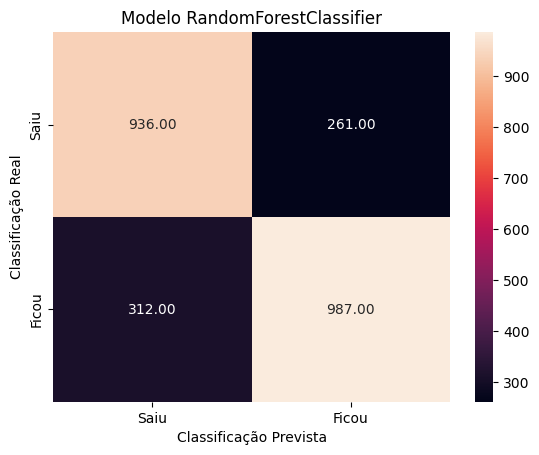

In [109]:
#Faça a Matriz de Confusão (confusion_matriz) do seu modelo de melhor F1-score, conforme resposta do Exercício 8
#e8b = f1_score(e8y_test, rf.predict(e8X_test))

forest_y_pred = rf.predict(e8X_test)

forest_cm = metrics.confusion_matrix(forest_y_pred, e8y_test)

sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Saiu", "Ficou"] , yticklabels = ["Saiu", "Ficou"] )

plt.ylabel('Classificação Real')
plt.xlabel('Classificação Prevista')
plt.title('Modelo RandomForestClassifier')

In [110]:
# 260 pessoas que previu Sair, mas na verdade Ficaram 988
# 933 pessoas que previu Sair e acertou as 933
# Erro maior: 315 pessoas que previu Ficar, mas verdade Saíram
forest_cm

array([[936, 261],
       [312, 987]], dtype=int64)

In [111]:
#b2a) Quantos foram os casos de falso positivo do seu modelo, ou seja, os casos em que o modelo previu que a pessoa sairia, mas ela não saiu?
#b2b) Quantos foram os casos de falso negativo?
# Extrair valores da matriz de confusão
true_negatives = forest_cm[0, 0]
b2b = forest_cm[0, 1]
b2a = forest_cm[1, 0]
true_positives = forest_cm[1, 1]

In [112]:
# Exibir os valores ou fazer o que quiser com eles
print("True Negatives:", true_negatives)
print("Falso Positivo:", b2a)
print("Falso Negativo:", b2b)
print("True Positives:", true_positives)

True Negatives: 936
Falso Positivo: 312
Falso Negativo: 261
True Positives: 987


In [113]:
#b2c) Considerando o cenário proposto, onde o gestor esteja buscando, principalmente, reter talentos. 
#Na sua análise, qual dos dois erros acima é o mais crítico para esse contexto do nosso problema de negócio?

#a) falso positivo
#b) falso negativo
#c) os dois erros são igualmente críticos
#d) nenhum dos dois, é indiferente

b2c = "b"
print("A opção", b2c, "que é o Falso Negativo, considero o erro mais crítico para esse contexto do nosso problema de negócio")

A opção b que é o Falso Negativo, considero o erro mais crítico para esse contexto do nosso problema de negócio


# Boletim de Soluções

#### Não Altere esta parte

In [114]:
#importa pickle para análise:
import pickle

In [ ]:
#Boletim de soluções para validação:
if 'exercicio1' in globals():
    print('DataFrame exercicio1 localizado. Ele poderá ser enviado para validação.')
    with open(f'{chaveF}_exercicio1.pkl','wb') as f:
        pickle.dump(exercicio1, f)
        f.close()
else:
    print('O Exercício 1 não tem condições de ser avaliado.')


if 'exercicio2' in globals():

    print('DataFrame exercicio2 localizado. Ele poderá ser enviado para validação.')
    with open(f'{chaveF}_exercicio2.pkl','wb') as f:
        pickle.dump(exercicio2, f)
        f.close()
else:
    print('O Exercício 2 não tem condições de ser avaliado.')

if 'exercicio3' in globals():

    print('DataFrame exercicio3 localizado. Ele poderá ser enviado para validação.')
    with open(f'{chaveF}_exercicio3.pkl','wb') as f:
        pickle.dump(exercicio3, f)
        f.close()
else:
    print('O Exercício 3 não tem condições de ser avaliado.')

if 'exercicio4' in globals():

    print('DataFrame exercicio4 localizado. Ele poderá ser enviado para validação.')
    with open(f'{chaveF}_exercicio4.pkl','wb') as f:
        pickle.dump(exercicio4, f)
        f.close()
else:
    print('O Exercício 4 não tem condições de ser avaliado.')

if ('exercicio5' in globals()) & ('e5X' in globals()) & ('e5y' in globals()):

    print('DataFrames exercicio5, e5X e e5y localizados. Eles poderão ser enviados para validação.')
    with open(f'{chaveF}_exercicio5.pkl','wb') as f:
        pickle.dump(exercicio5, f)
        f.close()
    with open(f'{chaveF}_e5X.pkl','wb') as f:
        pickle.dump(e5X, f)
        f.close()
    with open(f'{chaveF}_e5y.pkl','wb') as f:
        pickle.dump(e5y, f)
        f.close()
else:
    print('O Exercício 5 não tem condições de ser avaliado.')

if ('b1X' in globals()) & ('b1y' in globals()):

    print('DataFrames b1X e b1y localizados. Eles poderão ser enviados para validação.')
    with open(f'{chaveF}_b1X.pkl','wb') as f:
        pickle.dump(b1X, f)
        f.close()
    with open(f'{chaveF}_b1y.pkl','wb') as f:
        pickle.dump(b1y, f)
        f.close()
else:
    print('O Exercício Bônus 1 não tem condições de ser avaliado.')

if ('e6X_train' in globals()) & ('e6X_test' in globals()) & ('e6y_train' in globals()) & ('e6y_test' in globals()):

    print('DataFrames e6X_train, e6X_test, e6y_train e e6y_test localizados. Eles poderão ser enviados para validação.')
    with open(f'{chaveF}_e6X_train.pkl','wb') as f:
        pickle.dump(e6X_train, f)
        f.close()
    with open(f'{chaveF}_e6X_test.pkl','wb') as f:
        pickle.dump(e6X_test, f)
        f.close()
    with open(f'{chaveF}_e6y_train.pkl','wb') as f:
        pickle.dump(e6y_train, f)
        f.close()
    with open(f'{chaveF}_e6y_test.pkl','wb') as f:
        pickle.dump(e6y_test, f)
        f.close()
else:
    print('O Exercício 6 não tem condições de ser avaliado.')    

if ('e7X_train' in globals()) & ('e7X_test' in globals()):

    print('DataFrames e7X_train e e7X_test localizados. Eles poderão ser enviados para validação.')
    with open(f'{chaveF}_e7X_train.pkl','wb') as f:
        pickle.dump(e7X_train, f)
        f.close()
    with open(f'{chaveF}_e7X_test.pkl','wb') as f:
        pickle.dump(e7X_test, f)
        f.close()
else:
    print('O Exercício 7 não tem condições de ser avaliado.')   

k1 = 'e8X_train' in globals()
k2 = 'e8X_test' in globals() 
k3 = 'e8y_train' in globals()
k4 = 'e8y_test' in globals()

k5 = 'logreg' in globals()
k6 = 'rf' in globals()
k7 = 'svc' in globals()

exercicio8 = {}

exercicio8['variavel'] = []
exercicio8['valor'] = []
if 'e8a' in globals():
    exercicio8['variavel'].append('e8a')
    exercicio8['valor'].append(e8a)
if 'e8b' in globals():
    exercicio8['variavel'].append('e8b')
    exercicio8['valor'].append(e8b)
if 'e8c' in globals():
    exercicio8['variavel'].append('e8c')
    exercicio8['valor'].append(e8c)
if 'e8d' in globals():
    exercicio8['variavel'].append('e8d')
    exercicio8['valor'].append(e8d)

exercicio8 = pd.DataFrame(exercicio8)

k8 = exercicio8.shape[0] == 4

cond_8 = k1 and k2 and k3 and k4 and k5 and k6 and k7 and k8
      
if cond_8:
   
    #k1 à k4
    with open(f'{chaveF}_e8X_train.pkl','wb') as f:
        pickle.dump(e8X_train, f)
        f.close()
    with open(f'{chaveF}_e8X_test.pkl','wb') as f:
        pickle.dump(e8X_test, f)
        f.close()
    with open(f'{chaveF}_e8y_train.pkl','wb') as f:
        pickle.dump(e8y_train, f)
        f.close()
    with open(f'{chaveF}_e8y_test.pkl','wb') as f:
        pickle.dump(e8y_test, f)
        f.close()
    
    #k8
    exercicio8.to_csv(f'{chaveF}_exercicio8.csv', header=True, sep=',', index=False, float_format='%.3f')
    
    #k5 à k7
    with open(f'{chaveF}_logreg.pkl','wb') as f:
        pickle.dump(logreg, f)
        f.close()

    with open(f'{chaveF}_rf.pkl','wb') as f:
        pickle.dump(rf, f)
        f.close()


    with open(f'{chaveF}_svc.pkl','wb') as f:
        pickle.dump(svc, f)
        f.close()
        
    print('O Exercício 8 será avaliado.')
else:
    print('O Exercício 8 não tem condições de ser avaliado.')  

bonus2 = {}
bonus2['variavel'] = []
bonus2['valor'] = []

if 'b2a' in globals():
    bonus2['variavel'].append('b2a')
    bonus2['valor'].append(b2a)

if 'b2b' in globals():
    bonus2['variavel'].append('b2b')
    bonus2['valor'].append(b2b)

if 'b2c' in globals():
    bonus2['variavel'].append('b2c')
    bonus2['valor'].append(b2c)

exb2 = pd.DataFrame(bonus2)

if exb2.shape[0] == 3 and cond_8:
    print('Variáveis b2a, b2b, e b2c localizadas. Elas poderão ser enviadas para validação.')
    exb2.to_csv(f'{chaveF}_exb2.csv', header=True, sep=',', index=False)
    print('O Bônus 2 será avaliado.')
else:
    print('O Exercício Bônus 2 não tem condições de ser avaliado.')

DataFrame exercicio1 localizado. Ele poderá ser enviado para validação.
DataFrame exercicio2 localizado. Ele poderá ser enviado para validação.
DataFrame exercicio3 localizado. Ele poderá ser enviado para validação.
DataFrame exercicio4 localizado. Ele poderá ser enviado para validação.
DataFrames exercicio5, e5X e e5y localizados. Eles poderão ser enviados para validação.
DataFrames b1X e b1y localizados. Eles poderão ser enviados para validação.
DataFrames e6X_train, e6X_test, e6y_train e e6y_test localizados. Eles poderão ser enviados para validação.
DataFrames e7X_train e e7X_test localizados. Eles poderão ser enviados para validação.
